### H2H11511K DAYAL ROHAN VOLETY 

## Objective of Tech Track-Machine Learning
##### ***Build a Machine Learning model to predict the order amount that customers can place in the upcoming days.*** 


### Problem Statement
***To build a Machine Learning Model to predict the order amount, customers might make in the upcoming days***

In [68]:
#Importing Basic libraries
import pandas as pd
import numpy as np

### 1) Create DataFrame

In [2]:
df=pd.read_csv(r"C:\Users\KIIT\Desktop\HRC\Final.csv")
df.head()

CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION   
0          946851639       3537  United States of America  South-Region  \
1          963432061       3449                Martinique  South-Region   
2          971991639       3238                   Moldova  South-Region   
3          754349803       3911      United Arab Emirates  South-Region   
4          930253442       2381                    Greece  South-Region   

  RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE   
0                  0,00                1000          3220  \
1                  0,00                1000          3220   
2              82342,02                I200          3260   
3               1471,24                N000          3290   
4                  0,00                N000          3290   

   ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA   
0             20220101                43012                SR02  \
1             20220101                43114                NR03   
2             20220101               110019                NR01   
3             20220101               153013                SR02   
4             20220101               160020                SR01   

   SOLD_TO_PARTY ORDER_AMOUNT  REQUESTED_DELIVERY_DATE ORDER_CURRENCY   
0      756141537       954,61                 20220113            EUR  \
1      798847812       787,36                 20220111            EUR   
2      960984659     67493,46                 20220112            EUR   
3      925857642      1405,54                 20220106            EUR   
4      947942786         0,00                 20220106            EUR   

   CREDIT_STATUS  CUSTOMER_NUMBER  
0            NaN         12311807  
1            NaN         12311807  
2           93.0         12118758  
3           93.0       1210499770  
4           64.0       1210351400

### 2) Description of Dataframe

In [3]:
df.describe()

CUSTOMER_ORDER_ID     SALES_ORG  COMPANY_CODE  ORDER_CREATION_DATE   
count       1.101925e+06  1.101925e+06  1.101925e+06         1.101925e+06  \
mean        8.763187e+08  3.304891e+03  3.431364e+03         2.022032e+07   
std         7.088594e+07  6.958920e+02  5.483805e+02         1.426756e+02   
min         7.534520e+08  2.100000e+03  5.900000e+01         2.022010e+07   
25%         8.149522e+08  2.702000e+03  3.260000e+03         2.022021e+07   
50%         8.763963e+08  3.305000e+03  3.660000e+03         2.022032e+07   
75%         9.376832e+08  3.908000e+03  3.670000e+03         2.022042e+07   
max         9.990063e+08  4.510000e+03  4.260000e+03         2.022060e+07   

       ORDER_CREATION_TIME  SOLD_TO_PARTY  REQUESTED_DELIVERY_DATE   
count         1.101925e+06   1.101925e+06             1.101925e+06  \
mean          1.340316e+05   8.763265e+08             2.022035e+07   
std           6.503618e+04   7.090306e+07             1.751912e+03   
min           0.000000e+00   7.534518e+08             2.019081e+07   
25%           8.170200e+04   8.148366e+08             2.022022e+07   
50%           1.509540e+05   8.763542e+08             2.022033e+07   
75%           1.853580e+05   9.377293e+08             2.022050e+07   
max           2.359590e+05   9.990075e+08             2.202022e+07   

       CREDIT_STATUS  CUSTOMER_NUMBER  
count  219478.000000     1.101925e+06  
mean       74.464771     1.074092e+09  
std        14.444210     4.042693e+08  
min        52.000000     1.210001e+07  
25%        64.000000     1.230006e+09  
50%        64.000000     1.230014e+09  
75%        93.000000     1.230014e+09  
max        93.000000     1.230025e+09

### 3) Shape of Dataframe

In [4]:
print(df.shape)

(1101925, 16)


### 4) Data Frame Informations


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

### 5) Null values  Present in the dataframe


In [6]:
df.isnull().sum()

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64

### 6) Replace all the null values with "NaN"

In [7]:
df.fillna("NaN",inplace=True)

### 7) Change the format of date columns - "ORDER_CREATION_DATE" to datetime[64] with the format as 

### "%Y%m%d"

In [8]:
df["ORDER_CREATION_DATE"]=pd.to_datetime(df["ORDER_CREATION_DATE"],format="%Y%m%d")

In [9]:
df["ORDER_CREATION_DATE"]

0         2022-01-01
1         2022-01-01
2         2022-01-01
3         2022-01-01
4         2022-01-01
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: ORDER_CREATION_DATE, Length: 1101925, dtype: datetime64[ns]

### 8) Do the same activity for the other date field i.e. "REQUESTED_DELIVERY_DATE" to datetime[64] with the format as "%Y%m%d"

In [10]:
df["REQUESTED_DELIVERY_DATE"]=pd.to_datetime(df["REQUESTED_DELIVERY_DATE"],format="%Y%m%d")
df["REQUESTED_DELIVERY_DATE"]

0         2022-01-13
1         2022-01-11
2         2022-01-12
3         2022-01-06
4         2022-01-06
             ...    
1101920   2022-06-01
1101921   2022-06-01
1101922   2022-06-01
1101923   2022-06-01
1101924   2022-06-01
Name: REQUESTED_DELIVERY_DATE, Length: 1101925, dtype: datetime64[ns]

### 9) Check how many records are having order date greater than the delivery date

In [11]:
period= (df['ORDER_CREATION_DATE'] > df['REQUESTED_DELIVERY_DATE'])
df_filtered = df.loc[period]

In [12]:
print("The Total Number of records having order date greater than the delivery date are",len(df_filtered))

The Total Number of records having order date greater than the delivery date are 27142


### 10) Remove those records where order date is greater than the delivery date 

In [13]:
df = df[df['ORDER_CREATION_DATE'] <= df['REQUESTED_DELIVERY_DATE']]

In [14]:
df


CUSTOMER_ORDER_ID  SALES_ORG      DISTRIBUTION_CHANNEL      DIVISION   
0                946851639       3537  United States of America  South-Region  \
1                963432061       3449                Martinique  South-Region   
2                971991639       3238                   Moldova  South-Region   
3                754349803       3911      United Arab Emirates  South-Region   
4                930253442       2381                    Greece  South-Region   
...                    ...        ...                       ...           ...   
1101920          853605710       2498                   Germany  South-Region   
1101921          998890898       4509                   Armenia  South-Region   
1101922          983330221       3951                     Nepal  South-Region   
1101923          926668029       3235                    Panama  South-Region   
1101924          921701000       2968                 Nicaragua  South-Region   

        RELEASED_CREDIT_VALUE PURCHASE_ORDER_TYPE  COMPANY_CODE   
0                        0,00                1000          3220  \
1                        0,00                1000          3220   
2                    82342,02                I200          3260   
3                     1471,24                N000          3290   
4                        0,00                N000          3290   
...                       ...                 ...           ...   
1101920                  0,00                 NaN          4260   
1101921                  0,00                 NaN          4260   
1101922                  0,00                 NaN          4260   
1101923                  0,00                 NaN          4260   
1101924                  0,00                 NaN          4260   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME CREDIT_CONTROL_AREA   
0                2022-01-01                43012                SR02  \
1                2022-01-01                43114                NR03   
2                2022-01-01               110019                NR01   
3                2022-01-01               153013                SR02   
4                2022-01-01               160020                SR01   
...                     ...                  ...                 ...   
1101920          2022-06-01                74357                NR02   
1101921          2022-06-01                84052                NR04   
1101922          2022-06-01                85322                NR01   
1101923          2022-06-01                90538                SR04   
1101924          2022-06-01               113357                NR02   

         SOLD_TO_PARTY ORDER_AMOUNT REQUESTED_DELIVERY_DATE ORDER_CURRENCY   
0            756141537       954,61              2022-01-13            EUR  \
1            798847812       787,36              2022-01-11            EUR   
2            960984659     67493,46              2022-01-12            EUR   
3            925857642      1405,54              2022-01-06            EUR   
4            947942786         0,00              2022-01-06            EUR   
...                ...          ...                     ...            ...   
1101920      946056501      4415,19              2022-06-01            SGD   
1101921      894775488         0,00              2022-06-01            SGD   
1101922      909729781         0,00              2022-06-01            SGD   
1101923      940836817         0,00              2022-06-01            SGD   
1101924      754385277      4415,19              2022-06-01            SGD   

        CREDIT_STATUS  CUSTOMER_NUMBER  
0                 NaN         12311807  
1                 NaN         12311807  
2                93.0         12118758  
3                93.0       1210499770  
4                64.0       1210351400  
...               ...              ...  
1101920           NaN       1210331804  
1101921           NaN       1210331804  
1101922           NaN       1210331811  
1101923           N

### 11) Check the number of records where the “ORDER_AMOUNT” field is having “-” in it..

In [15]:
check=df['ORDER_AMOUNT'].str.contains('-').sum()
print("Number of records where - is ",check)

Number of records where - is  32


### 12) Replace “-” with “ ” from the “ORDER_AMOUNT” field. 

In [16]:
df['ORDER_AMOUNT']=df['ORDER_AMOUNT'].str.replace('-',' ')

In [17]:
checking=df['ORDER_AMOUNT'].str.contains('-').sum()
print(checking)

0


### 13) Check the number of records where the “ORDER_AMOUNT” field is having “,” in it.

In [18]:
check_=df['ORDER_AMOUNT'].str.contains(',').sum()
print("Number of records where , is ",check_)

Number of records where , is  1073406


### 14) Replace “,” with “.” from the “ORDER_AMOUNT” field. 

In [82]:
df['ORDER_AMOUNT'] = df['ORDER_AMOUNT'].astype(str).str.replace(',', '.')
df

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION   
0                20.668653   8.171317              5.451038  0.693147  \
1                20.686013   8.146130              4.912655  0.693147   
2                20.694858   8.083020              4.955827  0.693147   
3                20.441367   8.271804              5.433722  0.693147   
4                20.650968   7.775696              4.418841  0.693147   
...                    ...        ...                   ...       ...   
1074778          20.564980   7.823646              4.382027  0.693147   
1074779          20.722156   8.414052              2.397895  0.693147   
1074780          20.706456   8.281977              5.023881  0.693147   
1074781          20.647106   8.082093              5.123964  0.693147   
1074782          20.641731   7.995980              5.056246  0.693147   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE   
0                     0.693147             0.000000      8.077447  \
1                     0.693147             0.000000      8.077447   
2                    10.680447             5.323010      8.089789   
3                     8.968651             5.545177      8.098947   
4                     0.693147             5.545177      8.098947   
...                        ...                  ...           ...   
1074778               0.693147             5.726848      8.357259   
1074779               0.693147             5.726848      8.357259   
1074780               0.693147             5.726848      8.357259   
1074781               0.693147             5.726848      8.357259   
1074782               0.693147             5.726848      8.357259   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  ...   
0                2022-01-01            10.669258             1.791759  ...  \
1                2022-01-01            10.671626             1.098612  ...   
2                2022-01-01            11.608417             0.000000  ...   
3                2022-01-01            11.938285             1.791759  ...   
4                2022-01-01            11.983060             1.609438  ...   
...                     ...                  ...                  ...  ...   
1074778          2022-06-01            11.216647             0.693147  ...   
1074779          2022-06-01            11.339203             1.386294  ...   
1074780          2022-06-01            11.354199             0.000000  ...   
1074781          2022-06-01            11.413536             2.079442  ...   
1074782          2022-06-01            11.638306             0.693147  ...   

         Last-3day_Sales Last-4day_Sales Last-5day_Sales  Last-6day_Sales   
0               0.000000        0.000000        0.000000         0.000000  \
1               0.000000        0.000000        0.000000         0.000000   
2               0.000000        0.000000        0.000000         0.000000   
3               0.000000        0.000000        0.000000         0.000000   
4               0.000000        0.000000        0.000000         0.000000   
...                  ...             ...             ...              ...   
1074778         5.568345        5.568345        5.568345         5.568345   
1074779         5.568345        5.568345        5.568345         5.568345   
1074780         5.568345        5.568345        5.568345         5.568345   
1074781         5.568345        5.568345        5.568345         5.568345   
1074782         6.929836        5.568345        5.568345         5.568345   

         Last-1day_Diff  Last-2day_Diff  Last-3day_Diff  Last-4day_Diff   
0              0.000000        0.000000        0.000000             0.0  \
1              0.000000        0.000000        0.000000             0.0   
2              0.000000        0.000000        0.000000             0.0   
3              0.000000        0.000000        0.000000             0.0   
4              0.000000        0.000000        0.000000           

### 15) Count the number of records where the order date and the delivery date are same

In [20]:
cnt= (df['ORDER_CREATION_DATE'] == df['REQUESTED_DELIVERY_DATE'])
df_filtered_cnt = df.loc[cnt]

In [21]:
print("Total number of records where the order date and the delivery date are",len(df_filtered_cnt))

Total number of records where the order date and the delivery date are 100437


### 16) Count the number of records for each currency type by using the field “'ORDER_CURRENCY'”


In [22]:
order_curr = df.groupby('ORDER_CURRENCY').size().sort_values(ascending=False)
print(order_curr)


ORDER_CURRENCY
USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HU1      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
dtype: int64


### 17) Create a new column in the existing dataframe as “'amount_in_usd'” and convert all the non-USD currencies in USD and store them in the same column.

In [23]:
#Creating New column
df['amount_in_usd'] = 0


In [24]:
#Taking USD as standard and converting rest currency W.R.T to USD and storing them in a dictionary for easy mapping
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'AUD': 0.66,
    'CAD': 0.74,
    'GBP': 1.24,
    'MYR': 0.22,
    'PLN': 0.24,
    'AED': 0.27,
    'HKD': 0.13,
    'CHF': 1.11,
    'RON': 0.22,
    'SGD': 0.74,
    'CZK': 0.046,
    'HU1': 0.0028,
    'NZD': 0.61,
    'BHD': 2.65,
    'SAR': 0.27,
    'QAR': 0.27,
    'KWD': 3.25,
    'SEK': 0.094
}

In [25]:
#iterating all the rows and checking if the currency is USD or not if not then converting it.
for index, row in df.iterrows():
    currency = row['ORDER_CURRENCY']
    amount = float(row['ORDER_AMOUNT'])
    
    if currency != 'USD':
        conversion_rate = conversion_rates.get(currency, 1.0)
        converted_amount = float(amount) * float(conversion_rate)
        df.at[index, 'amount_in_usd'] = converted_amount
    else:
        df.at[index, 'amount_in_usd'] = amount

### 18) Check for values “0” in the

In [27]:
count_Zero = (df['amount_in_usd'] == 0).sum()
print("Total count of 0 are",count_Zero)

Total count of 0 are 237821


### 19) Create a new column in the existing dataframe “unique_cust_id” by adding 'CUSTOMER_NUMBER' and 'COMPANY_CODE'


In [28]:
df['unique_cust_id'] = df['CUSTOMER_NUMBER'].astype(str) + df['COMPANY_CODE'].astype(str)

# Milestone 2 - EDA

### 1) Create a Histogram on DISTRIBUTION_CHANNEL

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

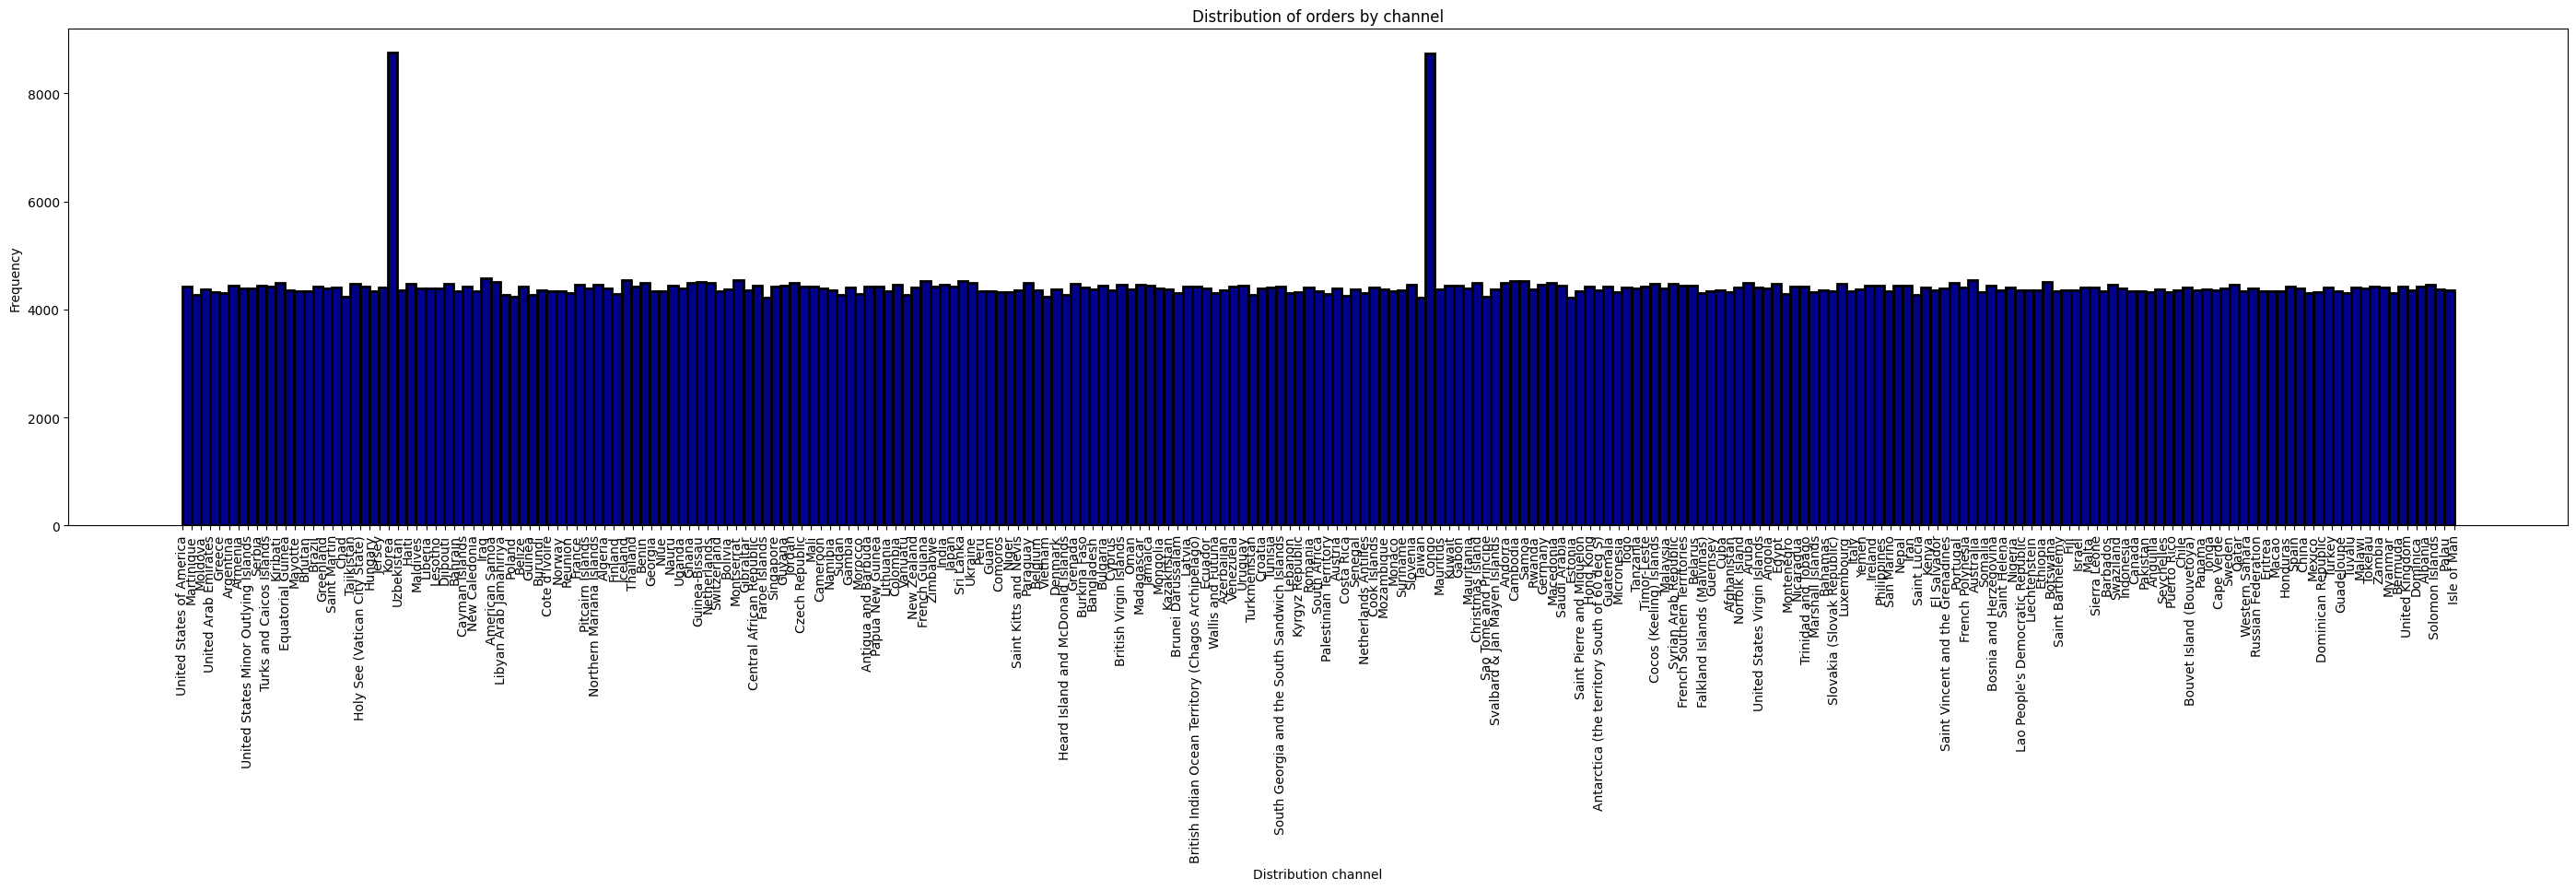

In [ ]:
#A histogram representing DISTRIBUTION_CHANNEL would visually display the frequency or count of orders across different distribution channels
plt.figure(figsize=(35,7))
plt.hist(df['DISTRIBUTION_CHANNEL'],bins=243,color = "darkblue",ec="black",lw=2)
plt.xlabel('Distribution channel')
plt.ylabel('Frequency')
plt.title('Distribution of orders by channel')
plt.xticks(rotation=90,fontsize=10)
plt.subplots_adjust(wspace=0.3)
plt.show()

### 2) Create a Pie Chart on ORDER_CURRENCY

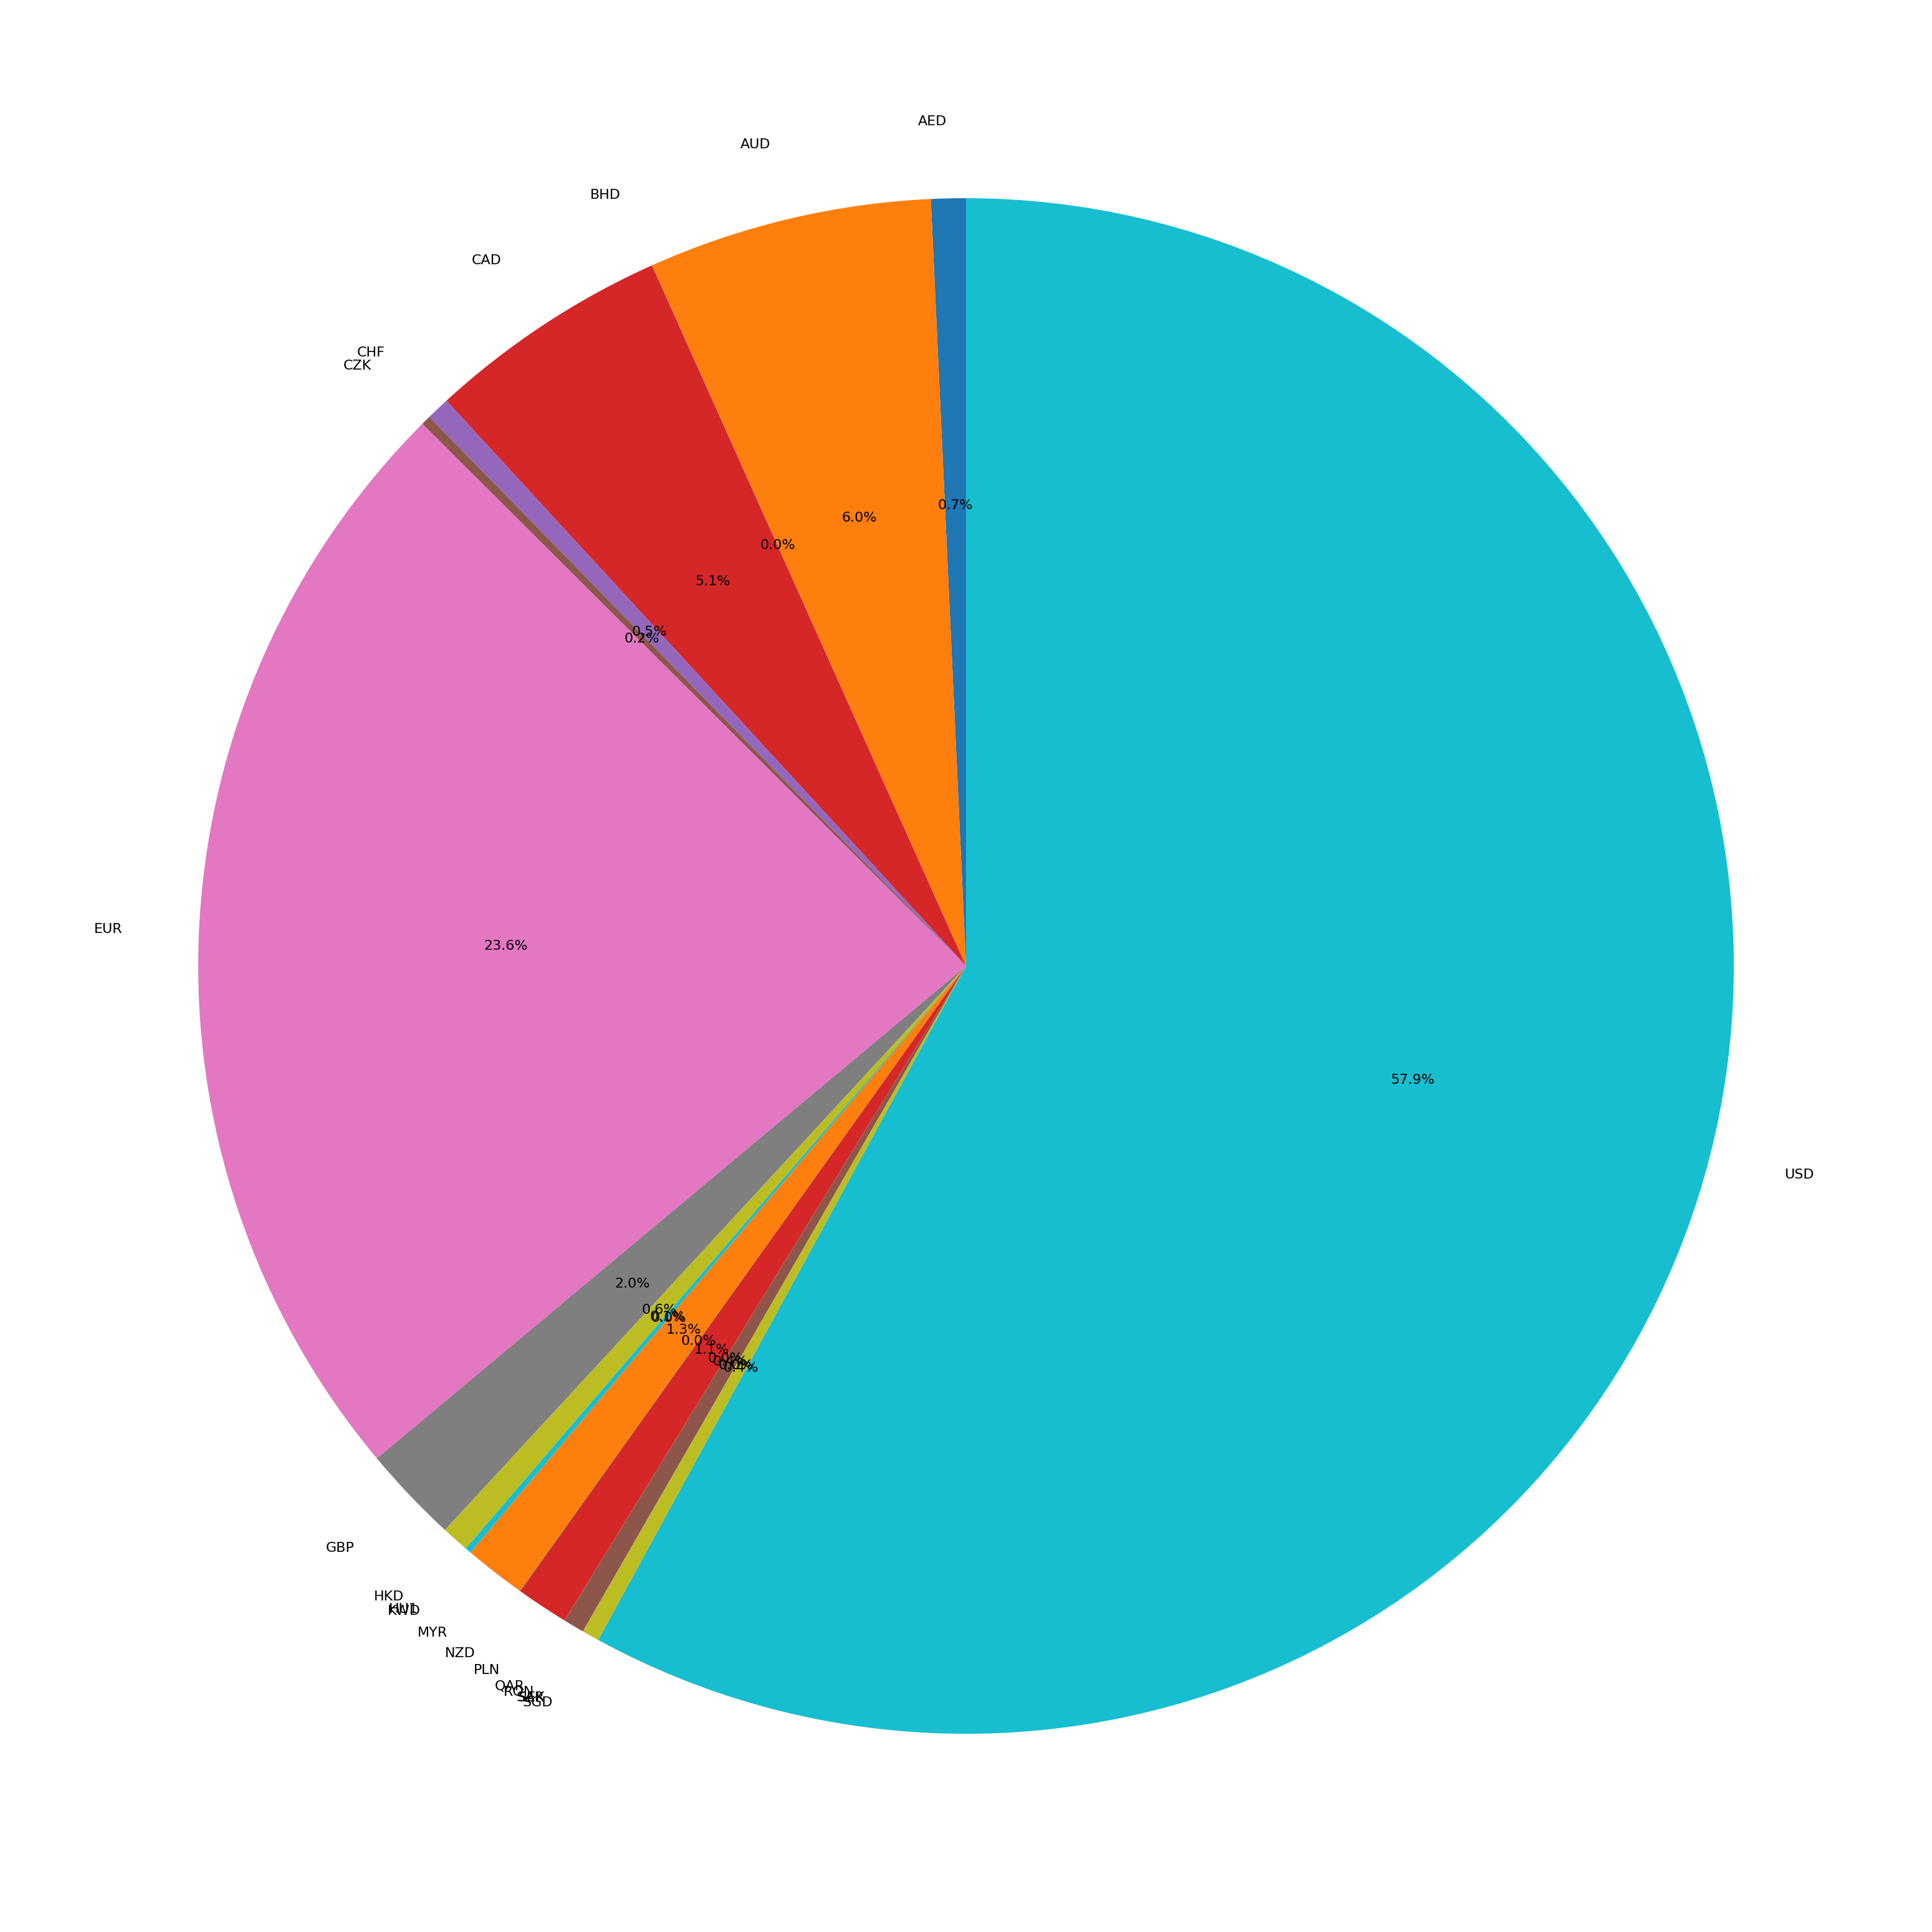

In [32]:
#The pie chart would be divided into slices, each representing a specific currency. 
#The size of each slice would correspond to the proportion of orders made in that currency.
grouped = df.groupby('ORDER_CURRENCY')
counts = grouped['ORDER_CURRENCY'].count()
plt.figure(figsize=(50,40))
plt.pie(counts, labels=counts.index,autopct='%1.1f%%',startangle=90,textprops={'fontsize': 16})
plt.show()

### 3) Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

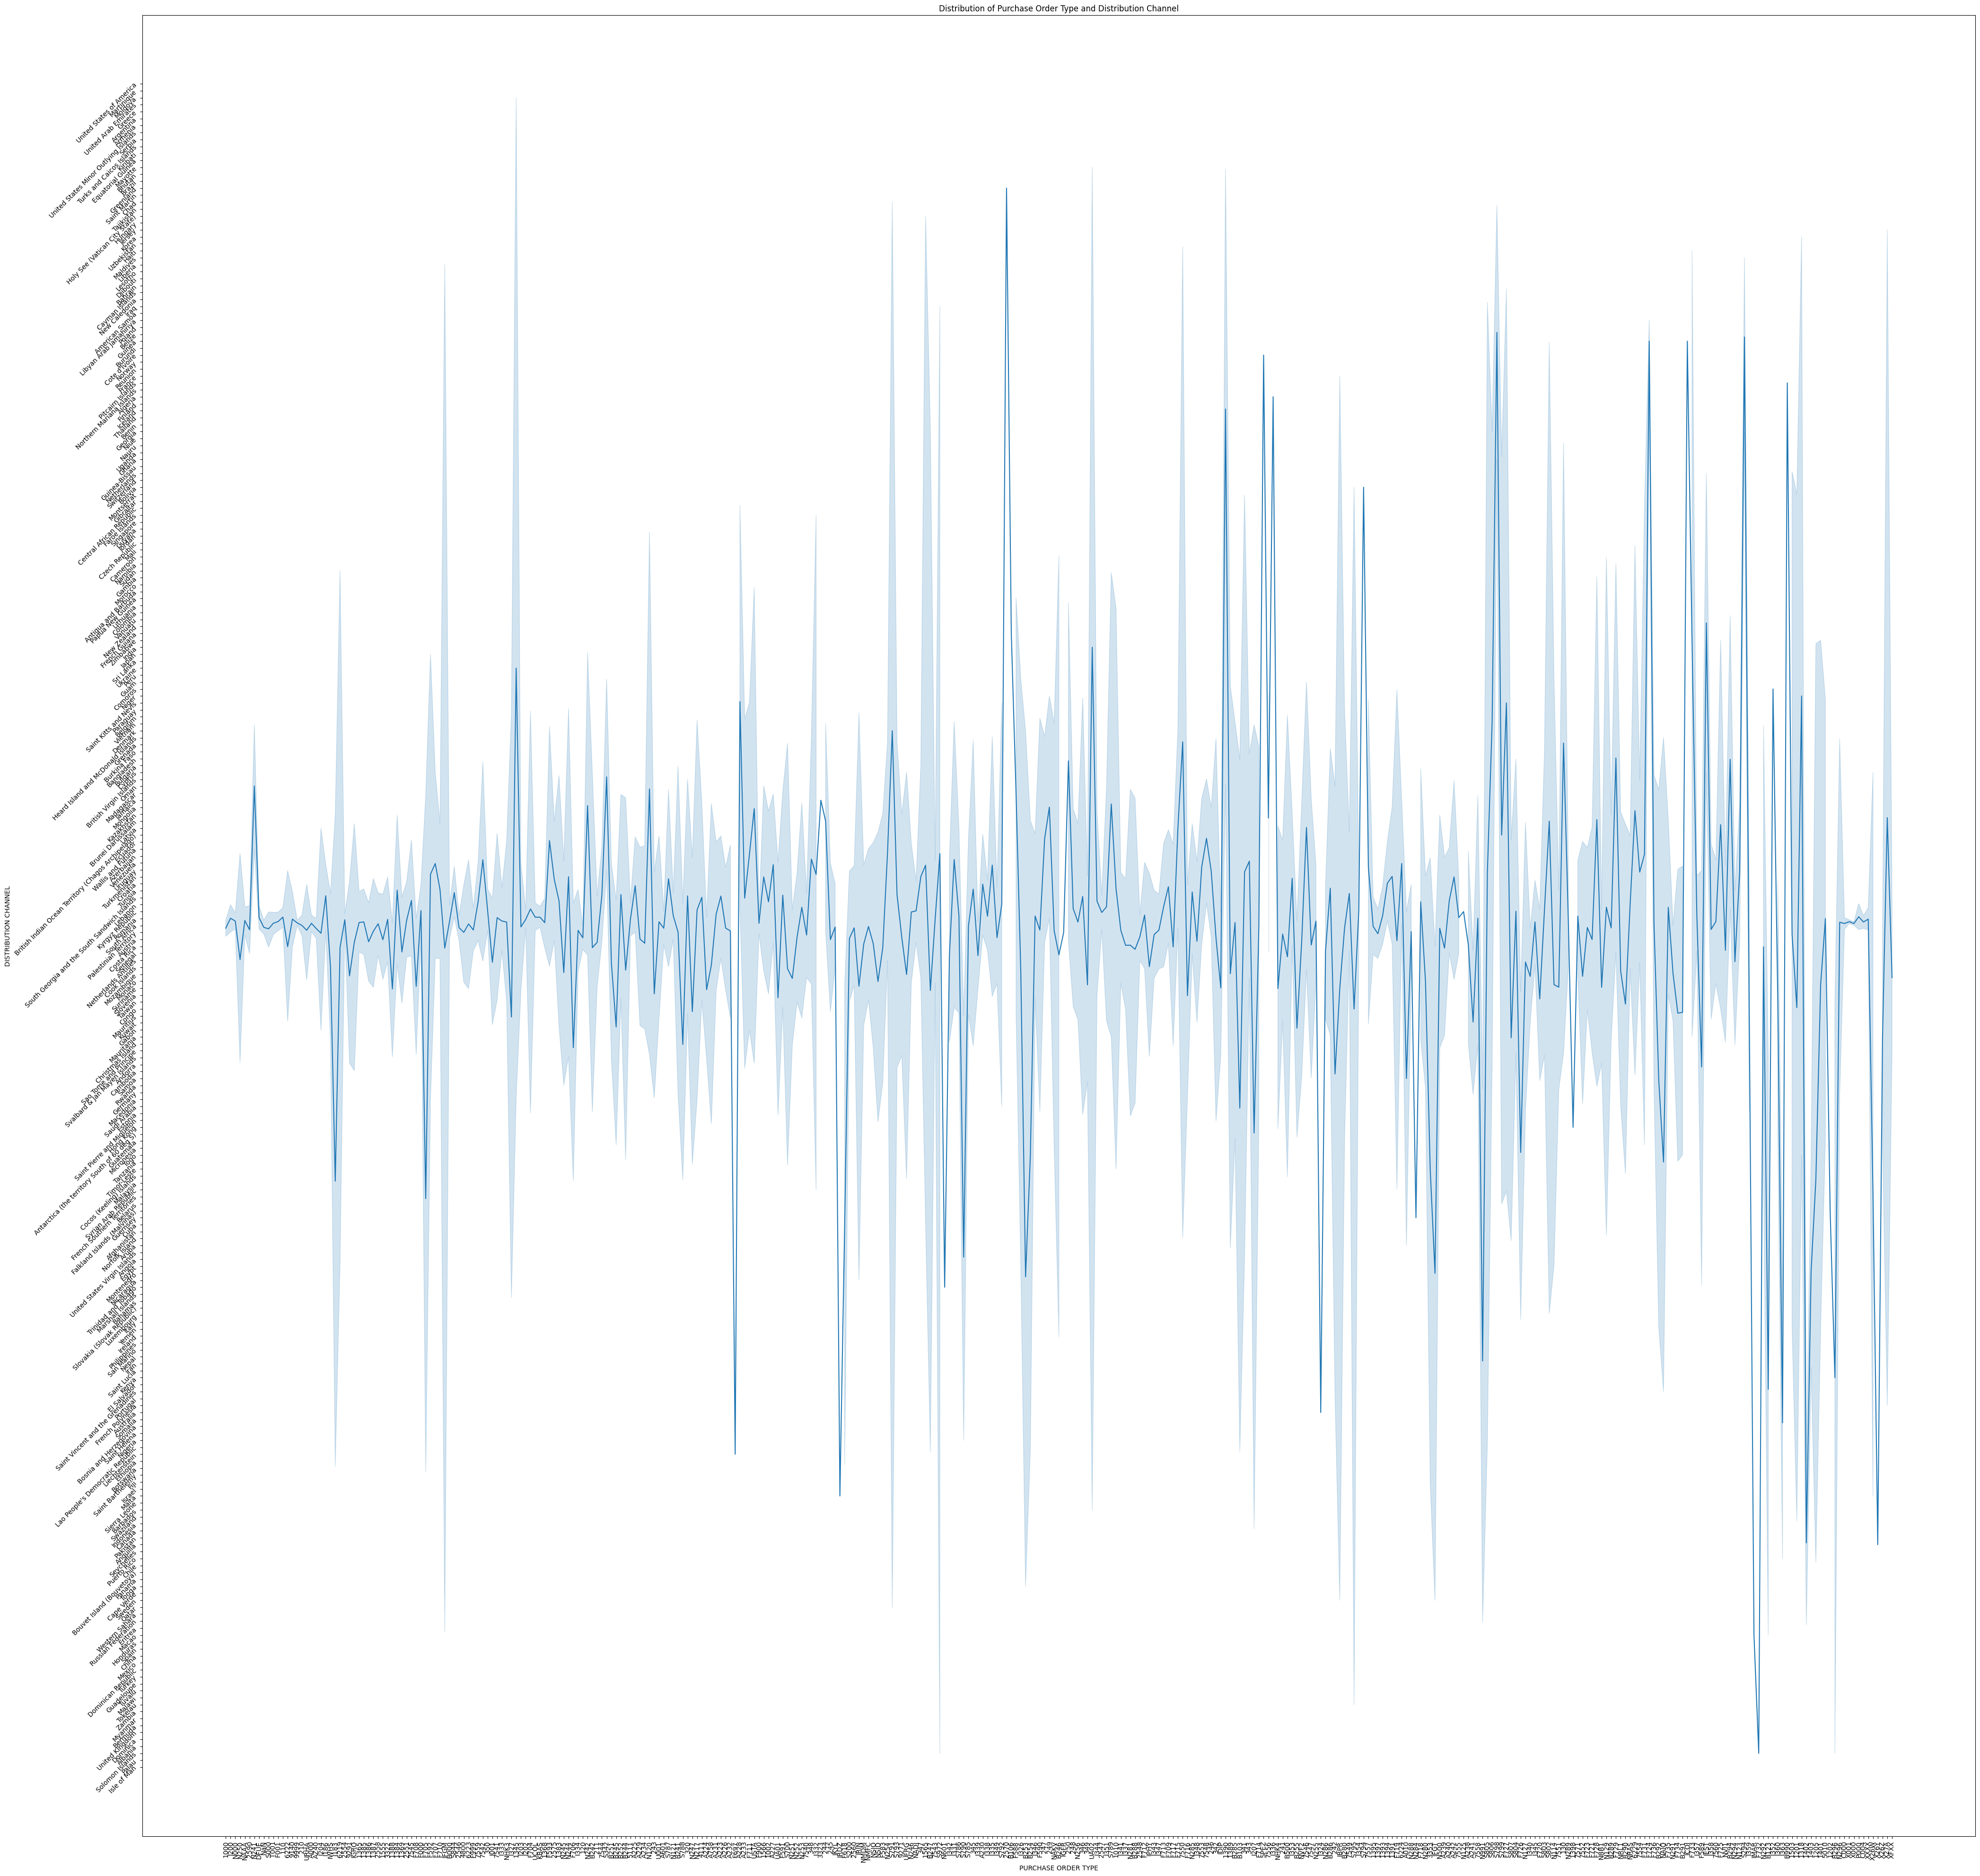

In [33]:
#A line chart showing the relationship between PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL 
#would illustrate how different purchase order types are distributed across various channels.
plt.figure(figsize=(50,50))
sns.lineplot(data=df,x="PURCHASE_ORDER_TYPE",y="DISTRIBUTION_CHANNEL")
plt.xlabel("PURCHASE ORDER TYPE")
plt.ylabel("DISTRIBUTION CHANNEL")
plt.title("Distribution of Purchase Order Type and Distribution Channel")
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.show( )

### 4) Create a line plot on ORDER_CREATION_DATE and amount_in_usd


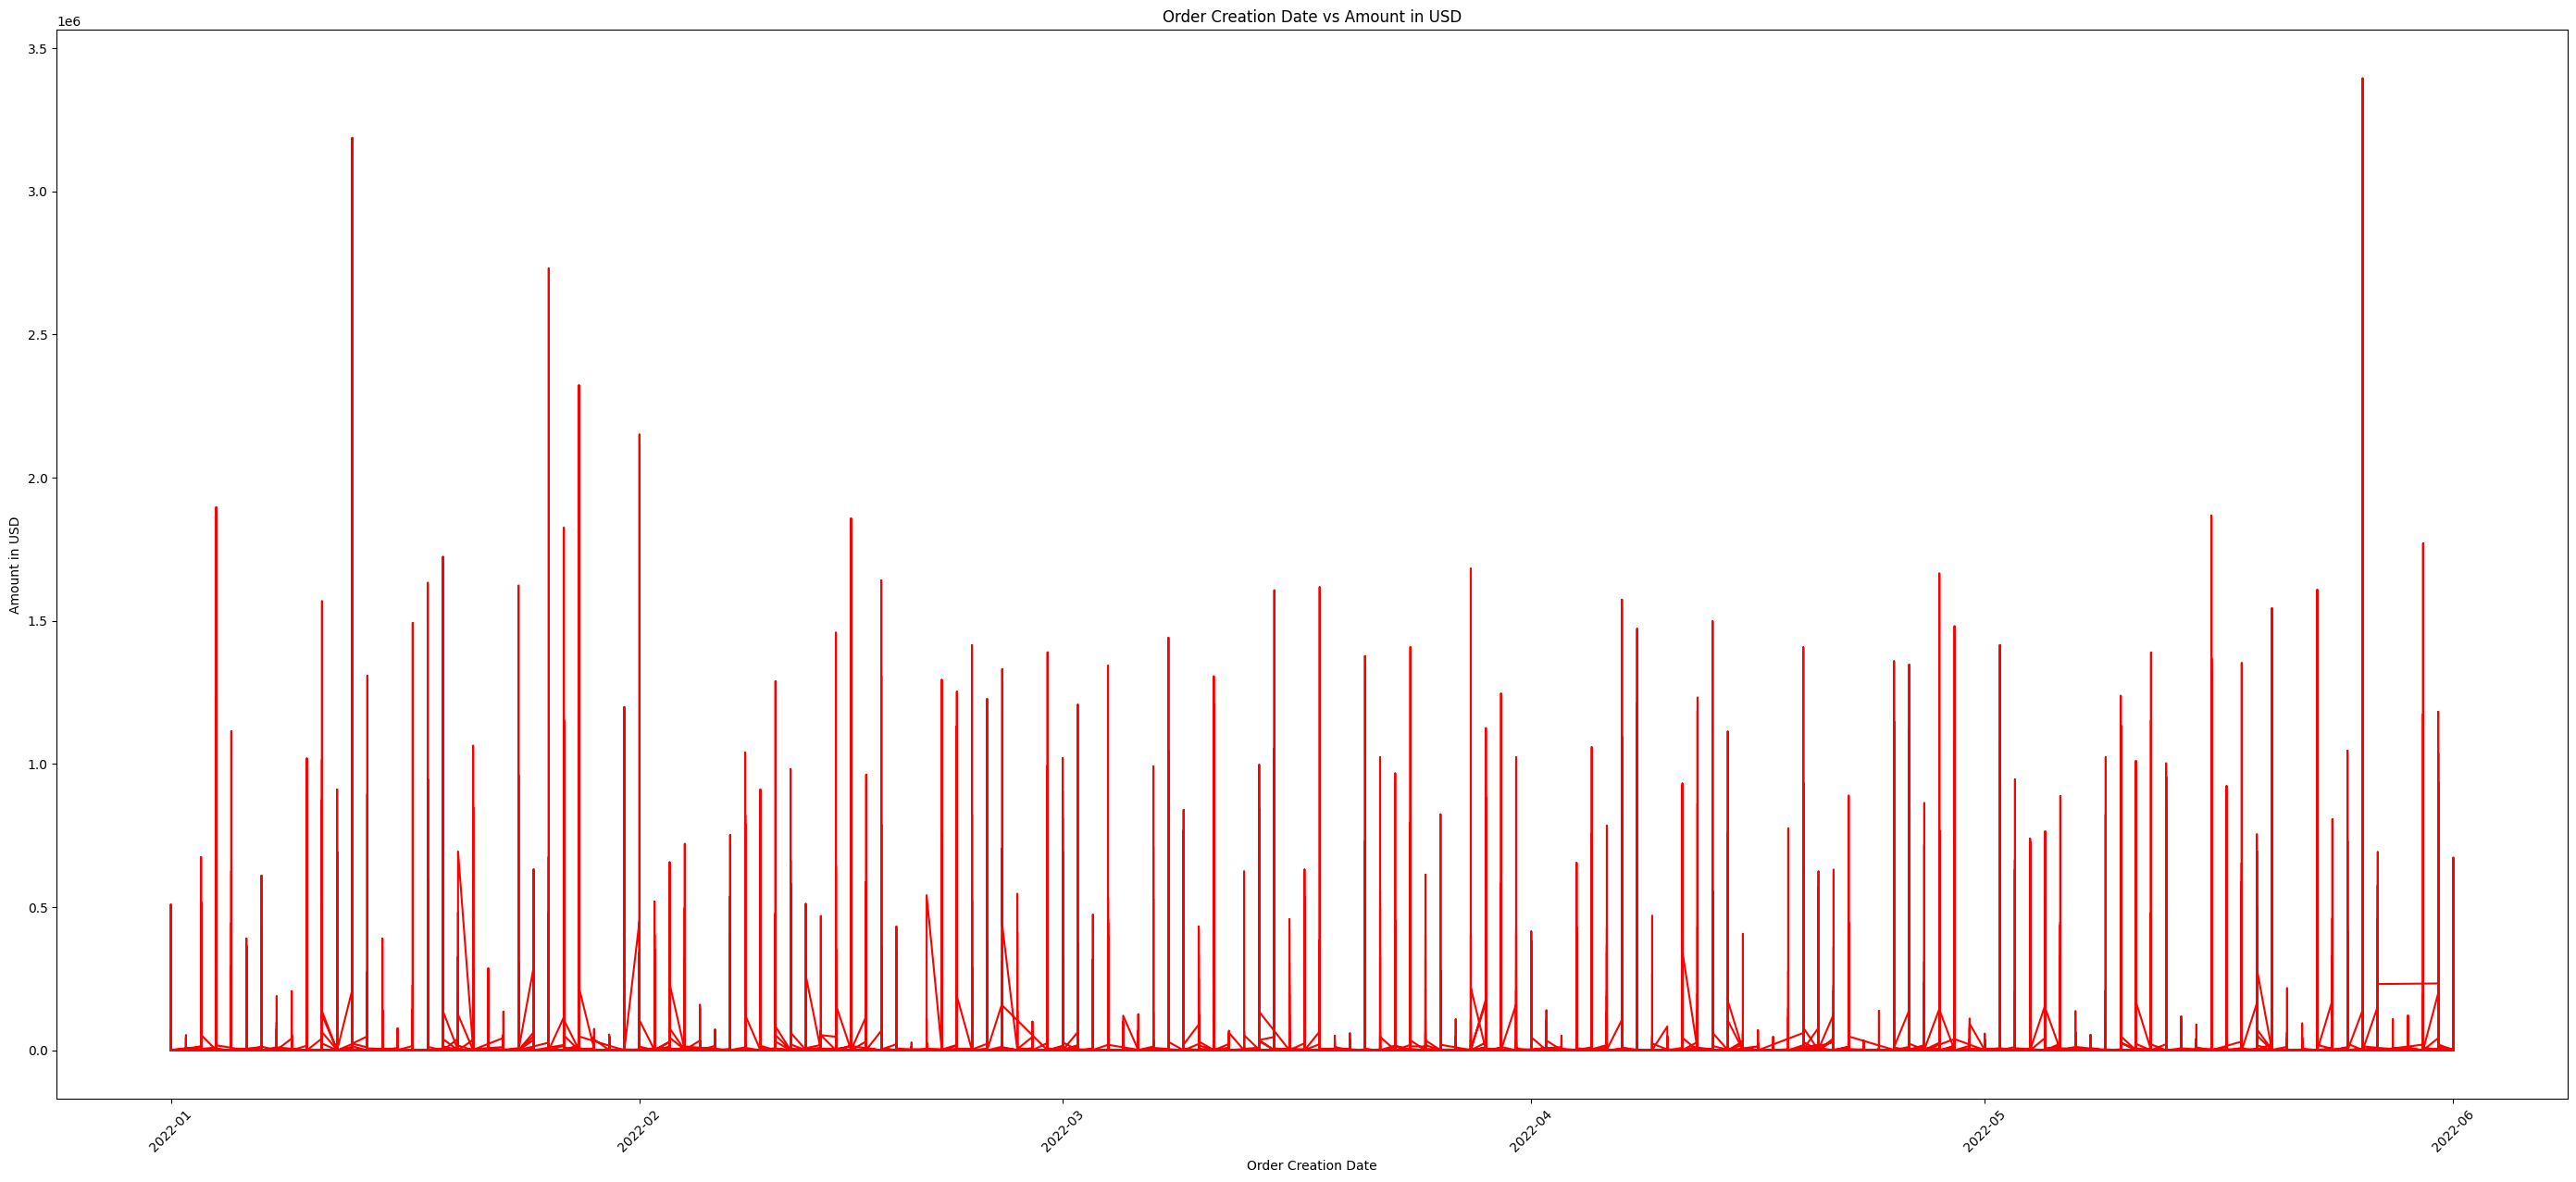

In [34]:
#A line plot of ORDER_CREATION_DATE and amount_in_usd would provide relationship between the order creation date and the corresponding amount in USD.
#The line plot would allow you to identify any trends or patterns in the amount_in_usd over time
df.sort_values('ORDER_CREATION_DATE')
plt.figure(figsize=(35, 15))
plt.plot(df['ORDER_CREATION_DATE'], df['amount_in_usd'],linestyle='-', color='r')
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Order Creation Date vs Amount in USD')
plt.xticks(rotation=45)

plt.show()

### 5) Create a boxplot on ORDER_AMOUNT	to find out the outliers


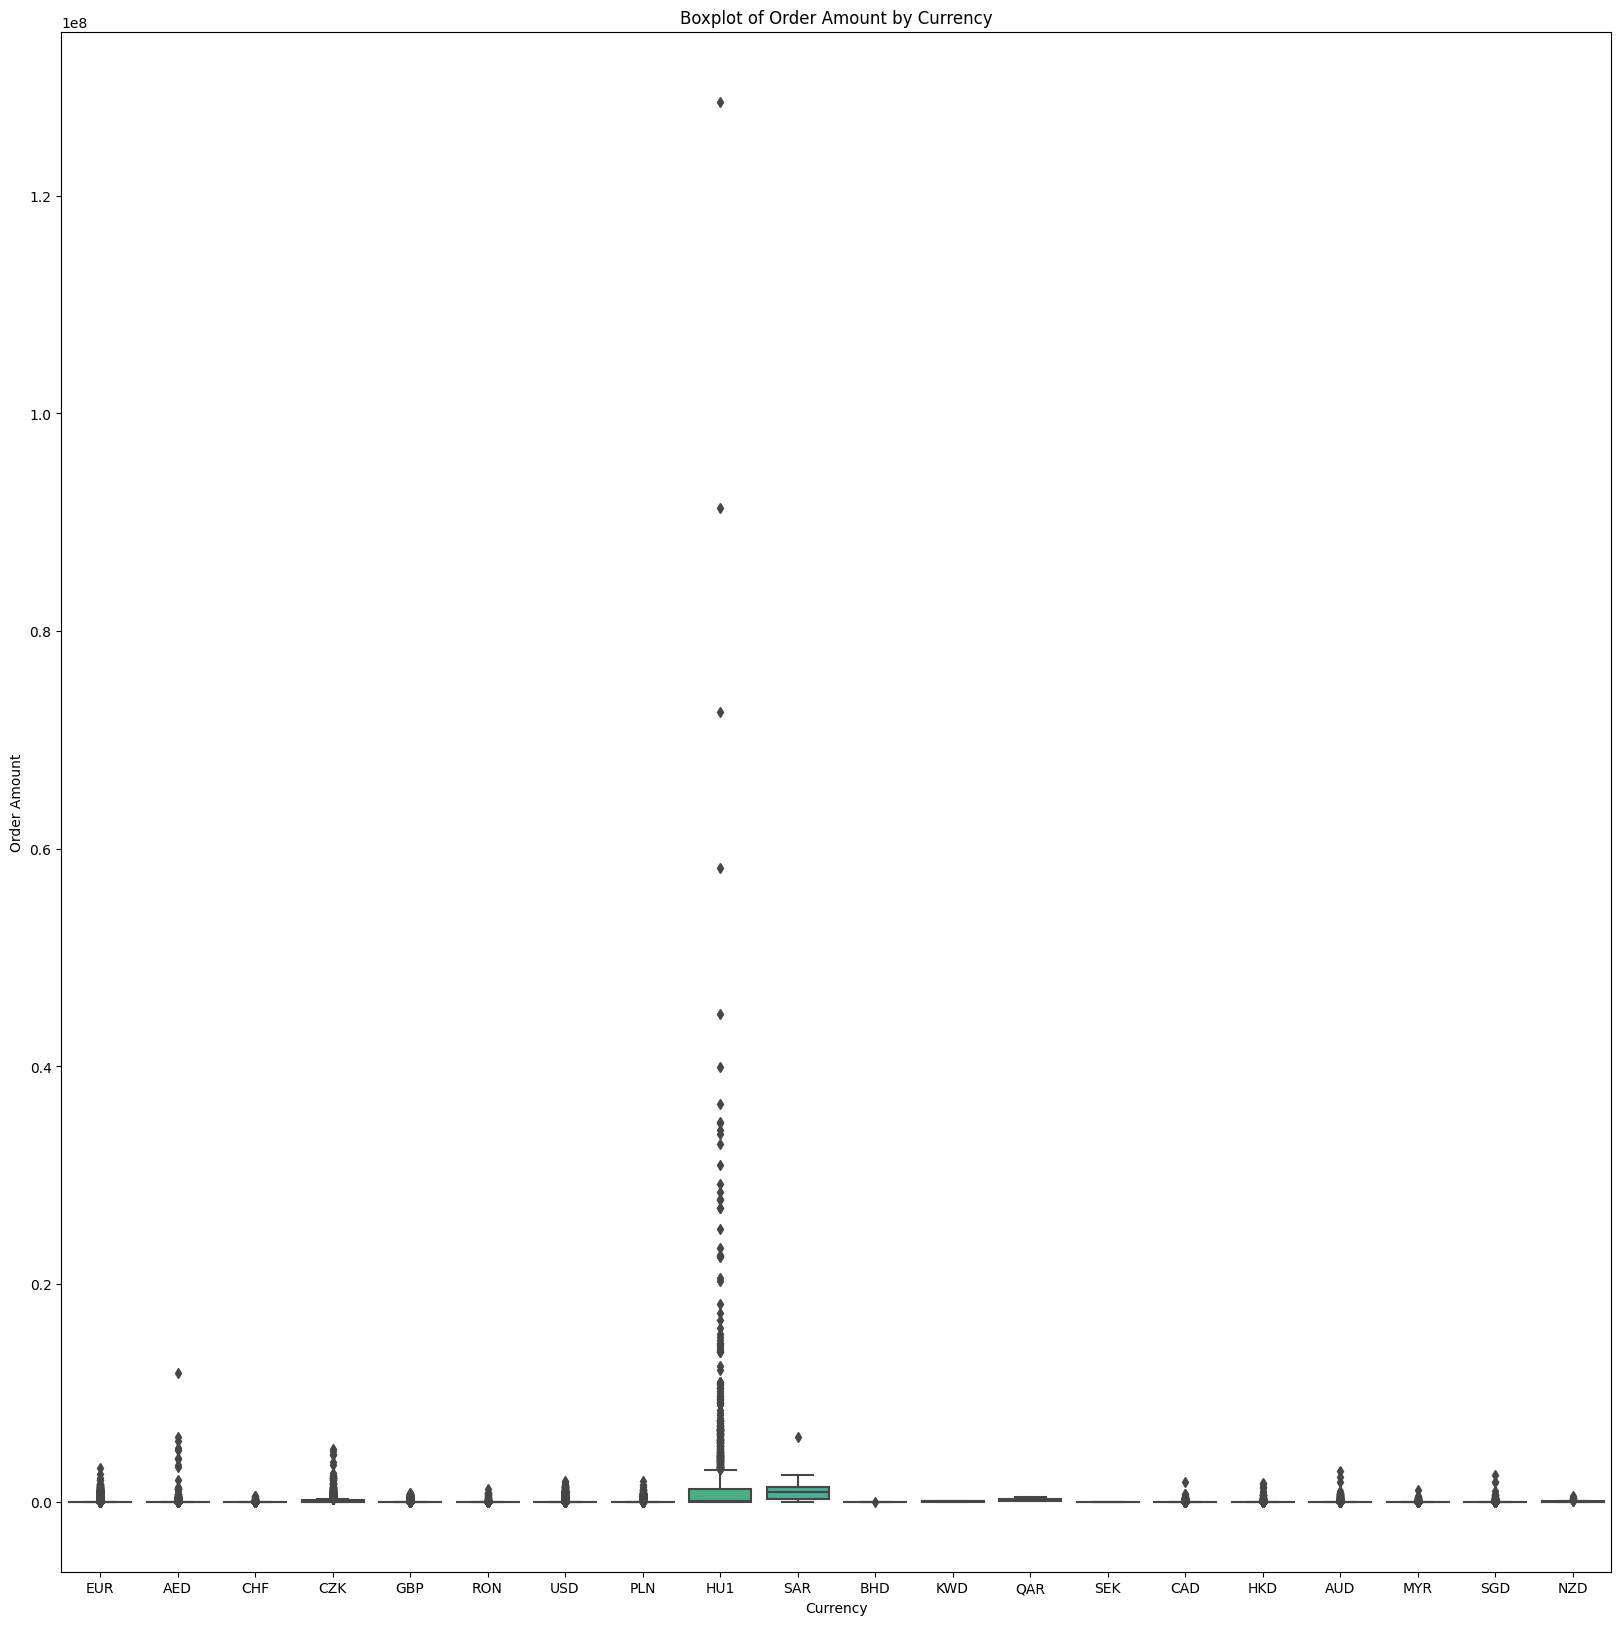

In [35]:
#The boxplot shows the outliers present in the dataset.In the below graph it is shown the outliers for each currency.

df['ORDER_AMOUNT'] = (df['ORDER_AMOUNT'].astype(float))
plt.figure(figsize=(20, 20))
sns.boxplot(data=df, x='ORDER_CURRENCY', y='ORDER_AMOUNT')
plt.xlabel('Currency')
plt.ylabel('Order Amount')
plt.title('Boxplot of Order Amount by Currency')
plt.show()

### 6) Create a barchart on COMPANY_CODE	 and ORDER_AMOUNT

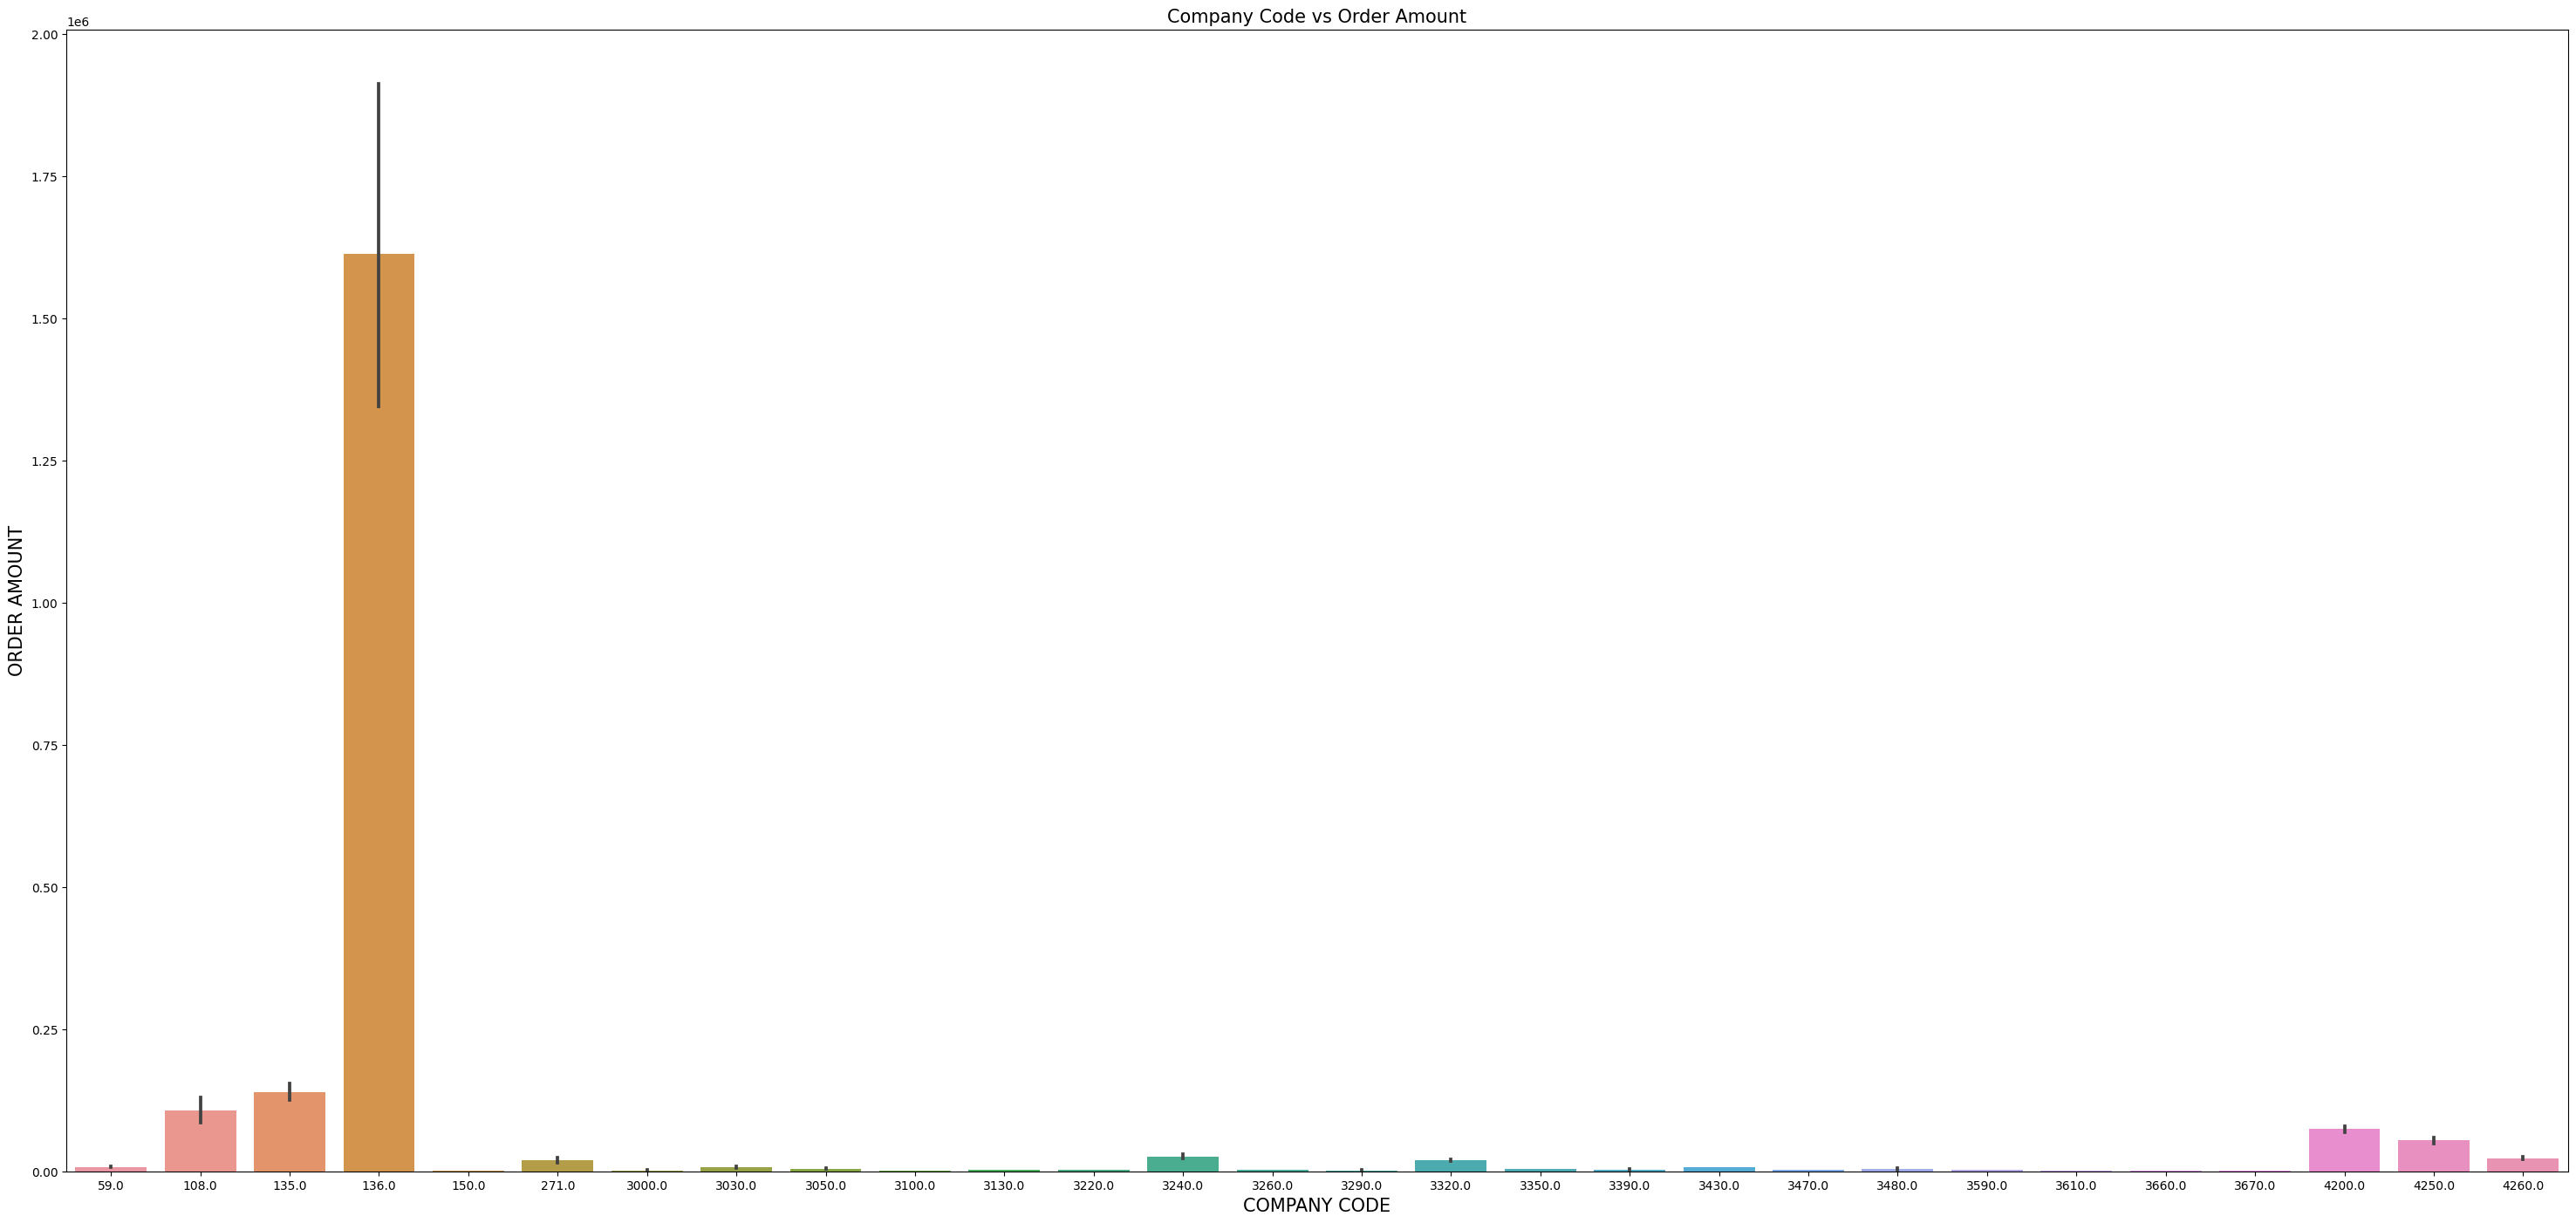

In [36]:
#This Graphs shows which company has how much order_amount
fig,axi = plt.subplots(figsize=(37, 17))
sns.barplot(x=df['COMPANY_CODE'].astype(float), y=df['ORDER_AMOUNT'].astype(float),ax=axi)
axi.set_xlabel('COMPANY CODE',fontsize=15)
axi.set_ylabel('ORDER AMOUNT',fontsize=15)
axi.set_title('Company Code vs Order Amount',fontsize=15)


plt.show()

## Milestone-3 Feature Engineering and Selection

In [37]:
from sklearn.preprocessing import LabelEncoder

### 1)Check for the outliers in the “amount_in_usd” column and replace the outliers with appropriate values, discussed in the sessions.


In [38]:
# Convert 'amount_in_usd' column to numeric type
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'], errors='coerce')

Q1 = df['amount_in_usd'].quantile(0.25)
Q3 = df['amount_in_usd'].quantile(0.75)
LQR = Q3 - Q1

# Define lower and upper bounds
l_b = Q1 - 1.5 * LQR
u_b = Q3 + 1.5 * LQR

# Identify outliers
outlier_idx = (df['amount_in_usd'] < l_b) | (df['amount_in_usd'] > u_b)

# Replace outliers with median
df.loc[outlier_idx, 'amount_in_usd'] = df['amount_in_usd'].median()


### 2) Label encoding or One hot Encoding on all the categorical columns 

In [40]:
# Performing Label encoding on all the categorical columns 
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype(str)
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


"""The reason for performing label encoding or one-hot encoding is to convert categorical variables
into a format that machine learning algorithms can process. Most machine learning models operate on 
numerical data, so categorical variables need to be transformed into numerical representations."""



### 3) Log Transformations on continuous columns 



In [42]:
# Identify the continuous columns
continuous_columns = df.select_dtypes(include=['float', 'int']).columns

# Apply log transformations
df[continuous_columns] = np.log1p(df[continuous_columns])

"""By applying a log transformation, the skewed data can be transformed
into a more symmetric or approximately symmetric distribution."""

### 4) Try to extract new features by grouping existing columns

In [43]:
df['ORDER_AMOUNT'] = pd.to_numeric(df['ORDER_AMOUNT'], errors='raise')


"""This feature counts the number of purchase orders for each unique company code. 
It captures the frequency of purchase orders associated with different company codes."""
df['PURCHASE_ORDER_COUNT_COMPANY_CODE'] = df.groupby('COMPANY_CODE')['PURCHASE_ORDER_TYPE'].transform('count')


"""This feature calculates the sum of all order amounts for each division. This can be used
 to predict the total amount of orders that are likely to be placed in a particular division in the future"""
df['SUM_ORDER_AMOUNT_BY_DIVISION'] = df.groupby('DIVISION')['ORDER_AMOUNT'].transform('sum')


"""This feature captures the average order amount for each currency. It can provide information about
 the typical order value associated with different currencies. This grouping is useful because 
 'ORDER_AMOUNT' contains different currencies, and by taking the mean, we can normalize the values across currencies."""
df['mean_order_amount_currency'] = df.groupby('ORDER_CURRENCY')['ORDER_AMOUNT'].transform('mean')


"""This feature calculates the sum of all order amounts for each purchase order type.This can be used to predict 
the total amount of orders that are likely to be placed in a particular purchase order type in the future."""
df['SUM_ORDER_AMOUNT_BY_PURCHASE_ORDER_TYPE'] = df.groupby('PURCHASE_ORDER_TYPE')['ORDER_AMOUNT'].transform('sum')


"""This feature counts the number of orders for each unique credit status. 
It captures the frequency of orders with different credit health statuses"""
df['ORDER_COUNT_PER_CREDIT_STATUS'] = df.groupby('CREDIT_STATUS')['CUSTOMER_ORDER_ID'].transform('count')


"""This feature calculates the maximum order amount for each combination of customer number and released credit value.
 This can be used to predict the maximum order amount that a customer is likely to place in the future, 
 given their customer number and released credit value."""
df['MAX_ORDER_AMOUNT_BY_CUSTOMER_NUMBER_AND_RELEASED_CREDIT_VALUE'] = df.groupby(['CUSTOMER_NUMBER', 'RELEASED_CREDIT_VALUE'])['ORDER_AMOUNT'].transform('max')




df.head(15)

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION   
0           20.668653   8.171317              5.451038  0.693147  \
1           20.686013   8.146130              4.912655  0.693147   
2           20.694858   8.083020              4.955827  0.693147   
3           20.441367   8.271804              5.433722  0.693147   
4           20.650968   7.775696              4.418841  0.693147   
5           20.524500   8.190354              2.302585  0.693147   
7           20.596971   8.201386              2.397895  0.000000   
8           20.526837   7.812378              5.451038  0.693147   
9           20.679518   8.055475              5.442418  0.693147   
10          20.507994   8.130648              5.267858  0.693147   
11          20.642313   7.763871              5.416100  0.693147   
12          20.568230   7.857481              4.736198  0.693147   
13          20.485228   8.147578              4.174387  0.693147   
14          20.615526   7.911324              4.934474  0.693147   
15          20.687474   7.668094              3.218876  0.693147   

    RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE   
0                0.693147             0.000000      8.077447  \
1                0.693147             0.000000      8.077447   
2               10.680447             5.323010      8.089789   
3                8.968651             5.545177      8.098947   
4                0.693147             5.545177      8.098947   
5                0.693147             5.602119      8.098947   
7                0.693147             5.676754      8.152198   
8                0.693147             4.043051      8.077447   
9                0.693147             5.579730      8.098947   
10              10.571676             5.579730      8.098947   
11               0.693147             5.579730      8.098947   
12               0.693147             5.579730      8.098947   
13               0.693147             5.579730      8.098947   
14               0.693147             5.579730      8.098947   
15               0.693147             5.579730      8.098947   

   ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  ...   
0           2022-01-01            10.669258             1.791759  ...  \
1           2022-01-01            10.671626             1.098612  ...   
2           2022-01-01            11.608417             0.000000  ...   
3           2022-01-01            11.938285             1.791759  ...   
4           2022-01-01            11.983060             1.609438  ...   
5           2022-01-01            11.983079             1.386294  ...   
7           2022-01-02            11.608445             1.386294  ...   
8           2022-01-02            11.775482             0.693147  ...   
9           2022-01-02            11.798217             1.098612  ...   
10          2022-01-02            11.798217             1.386294  ...   
11          2022-01-02            11.798217             0.693147  ...   
12          2022-01-02            11.798217             0.000000  ...   
13          2022-01-02            11.798217             0.693147  ...   
14          2022-01-02            11.798217             1.791759  ...   
15          2022-01-02            11.798217             1.791759  ...   

    unique_cust_id  PURCHASE_ORDER_COUNT_COMPANY_CODE   
0         8.796188                              94034  \
1         8.796188                              94034   
2         8.390723                              28055   
3         8.308938                              24812   
4         7.979339                              24812   
5         6.996681                              24812   
7         8.793005                               7334   
8         8.735364                              94034   
9         7.849324                              24812   
10        8.308938                              24812   
11        6.884487                              24812   
12        7.800982                   

### 5) Create a heatmap to find correlation between the columns


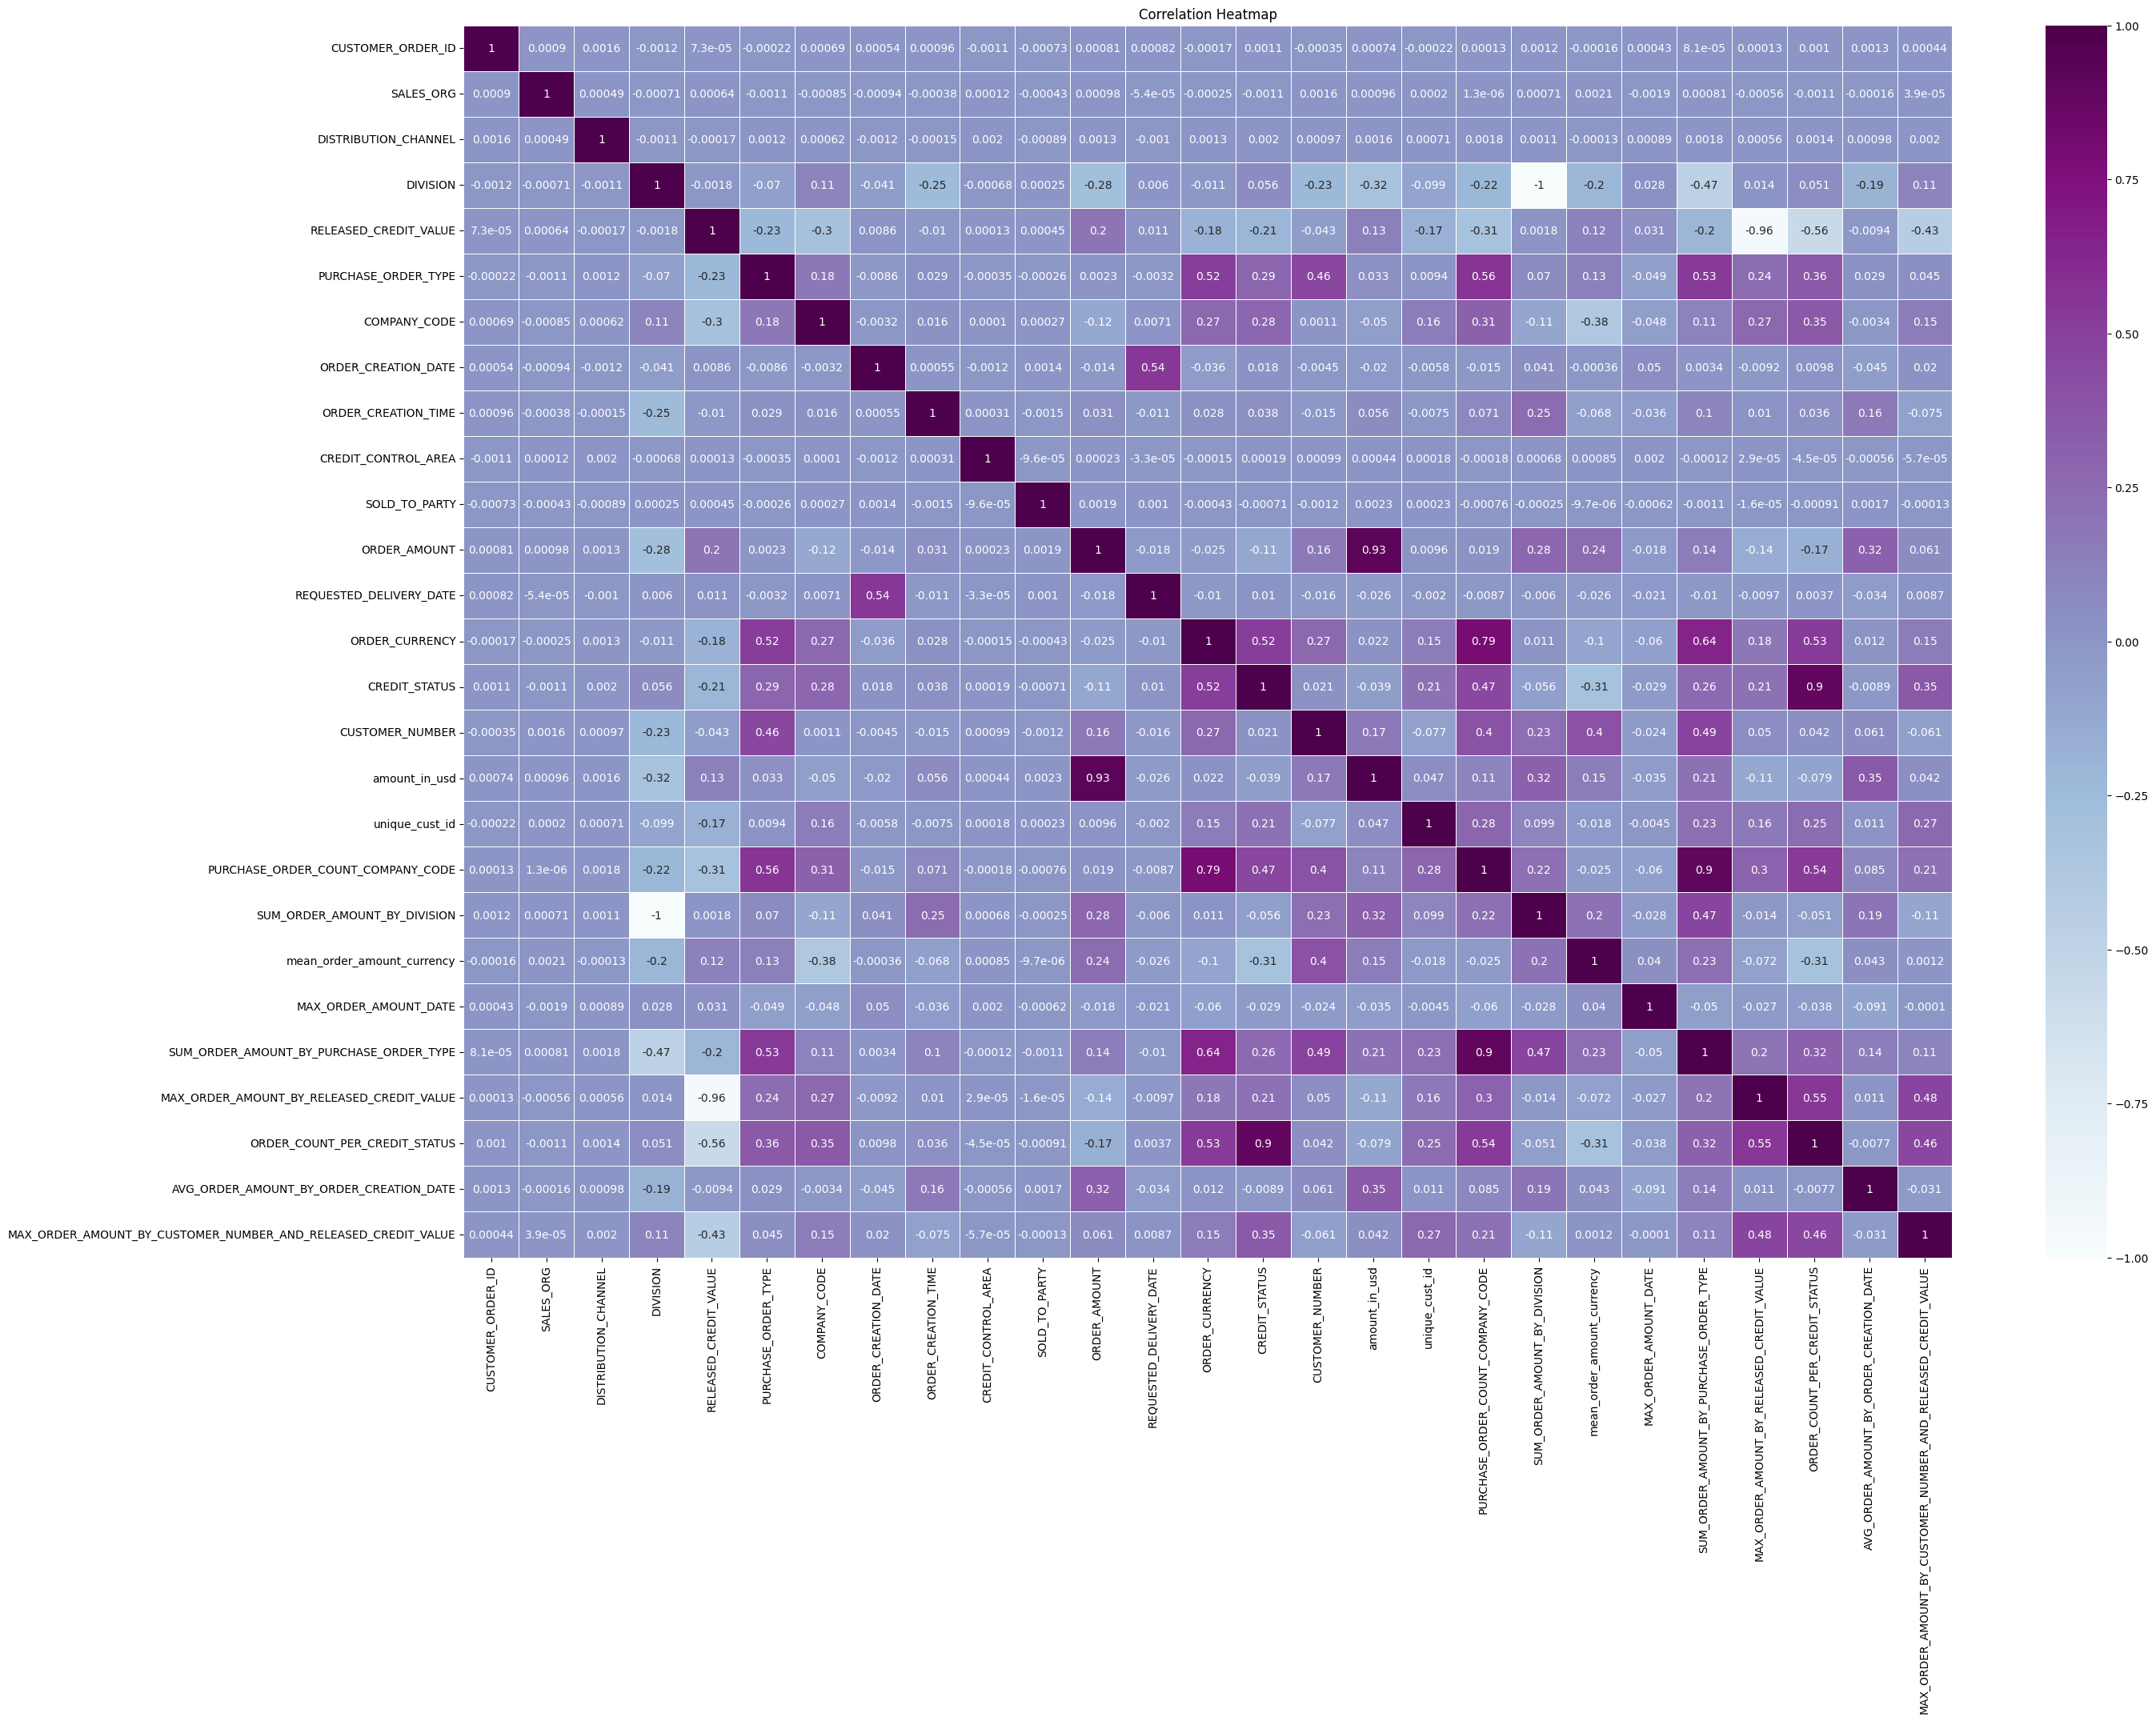

In [44]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

"""Heatmaps can be used to represent the correlation matrix of a dataset. 
In this case, each cell in the heatmap represents the correlation coefficient between two variables"""


### 6) Try to identify important or relevant columns for feature extraction

In [67]:
### To identify the relevant features we have used correlation with greater than 0.3 
correlation_matrix = df.corr()
corr_with_target = correlation_matrix['amount_in_usd'].abs().sort_values(ascending=False)
relevant_columns = corr_with_target[corr_with_target > 0.3].index.tolist()


In [46]:
relevant_columns

['amount_in_usd',
 'ORDER_AMOUNT',
 'AVG_ORDER_AMOUNT_BY_ORDER_CREATION_DATE',
 'DIVISION',
 'SUM_ORDER_AMOUNT_BY_DIVISION']

### 7) Introduce a particular module for datetime manipulation. 


In [47]:
#Code already Provided
def difference_in_days(melt, lags, ffday, customer_id_col, create_date_col, net_amount_col):
    # Converting the create_date_col to datetime if it's not already in datetime format
    melt[create_date_col] = pd.to_datetime(melt[create_date_col])
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Sales'] = melt.groupby([customer_id_col])[net_amount_col].shift(i)
    
    melt = melt.reset_index(drop=True)
    
    for i in range(ffday, lags+1):
        melt['Last-'+str(i)+'day_Diff']  = melt.groupby([customer_id_col])['Last-'+str(i)+'day_Sales'].diff()
    melt = melt.fillna(0)
    return melt
df = difference_in_days(df, 6, 1, 'unique_cust_id', 'ORDER_CREATION_DATE', 'amount_in_usd')
df

"""
The following code will present sales of previous days and their difference
"""

CUSTOMER_ORDER_ID  SALES_ORG  DISTRIBUTION_CHANNEL  DIVISION   
0                20.668653   8.171317              5.451038  0.693147  \
1                20.686013   8.146130              4.912655  0.693147   
2                20.694858   8.083020              4.955827  0.693147   
3                20.441367   8.271804              5.433722  0.693147   
4                20.650968   7.775696              4.418841  0.693147   
...                    ...        ...                   ...       ...   
1074778          20.564980   7.823646              4.382027  0.693147   
1074779          20.722156   8.414052              2.397895  0.693147   
1074780          20.706456   8.281977              5.023881  0.693147   
1074781          20.647106   8.082093              5.123964  0.693147   
1074782          20.641731   7.995980              5.056246  0.693147   

         RELEASED_CREDIT_VALUE  PURCHASE_ORDER_TYPE  COMPANY_CODE   
0                     0.693147             0.000000      8.077447  \
1                     0.693147             0.000000      8.077447   
2                    10.680447             5.323010      8.089789   
3                     8.968651             5.545177      8.098947   
4                     0.693147             5.545177      8.098947   
...                        ...                  ...           ...   
1074778               0.693147             5.726848      8.357259   
1074779               0.693147             5.726848      8.357259   
1074780               0.693147             5.726848      8.357259   
1074781               0.693147             5.726848      8.357259   
1074782               0.693147             5.726848      8.357259   

        ORDER_CREATION_DATE  ORDER_CREATION_TIME  CREDIT_CONTROL_AREA  ...   
0                2022-01-01            10.669258             1.791759  ...  \
1                2022-01-01            10.671626             1.098612  ...   
2                2022-01-01            11.608417             0.000000  ...   
3                2022-01-01            11.938285             1.791759  ...   
4                2022-01-01            11.983060             1.609438  ...   
...                     ...                  ...                  ...  ...   
1074778          2022-06-01            11.216647             0.693147  ...   
1074779          2022-06-01            11.339203             1.386294  ...   
1074780          2022-06-01            11.354199             0.000000  ...   
1074781          2022-06-01            11.413536             2.079442  ...   
1074782          2022-06-01            11.638306             0.693147  ...   

         Last-3day_Sales  Last-4day_Sales Last-5day_Sales  Last-6day_Sales   
0               0.000000         0.000000        0.000000         0.000000  \
1               0.000000         0.000000        0.000000         0.000000   
2               0.000000         0.000000        0.000000         0.000000   
3               0.000000         0.000000        0.000000         0.000000   
4               0.000000         0.000000        0.000000         0.000000   
...                  ...              ...             ...              ...   
1074778         5.568345         5.568345        5.568345         5.568345   
1074779         5.568345         5.568345        5.568345         5.568345   
1074780         5.568345         5.568345        5.568345         5.568345   
1074781         5.568345         5.568345        5.568345         5.568345   
1074782         6.929836         5.568345        5.568345         5.568345   

         Last-1day_Diff  Last-2day_Diff  Last-3day_Diff  Last-4day_Diff   
0              0.000000        0.000000        0.000000             0.0  \
1              0.000000        0.000000        0.000000             0.0   
2              0.000000        0.000000        0.000000             0.0   
3              0.000000        0.000000        0.000000             0.0   
4              0.000000        0.000000        0.00000

### 4) Milestone 4 - ML Models and Evaluations


In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.model_selection import KFold

### 1)  Modify the dataset to pass into any type of machine learning models. 

In [ ]:
#Performing an antilog on the target variable so that the prediction happens on raw data.
target_log = np.log1p(df['amount_in_usd'])
target_antilog = np.expm1(target_log)
df['amount_in_usd'] = target_antilog

In [50]:
X = df[['SUM_ORDER_AMOUNT_BY_DIVISION','mean_order_amount_currency','PURCHASE_ORDER_TYPE','CREDIT_STATUS',
        'DIVISION','RELEASED_CREDIT_VALUE','CREDIT_CONTROL_AREA',''
        'Last-5day_Sales','MAX_ORDER_AMOUNT_BY_CUSTOMER_NUMBER_AND_RELEASED_CREDIT_VALUE',
        'ORDER_COUNT_PER_CREDIT_STATUS']]  
# Select the columns containing multiple features selection based on corelation.


y = df['amount_in_usd']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=400)

### 2)Try different machine learning models:

### 2.1) Linear Regression

In [51]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_LR_test = model.predict(X_test)
y_pred_LR_train = model.predict(X_train)

# Calculate the mean squared error (MSE)
mse_test_LR = mean_squared_error(y_test, y_pred_LR_test)
mse_train_LR=mean_squared_error(y_train, y_pred_LR_train)

# Calculate the root mean squared error (RMSE)
rmse_test_LR = np.sqrt(mse_test_LR)
rmse_train_LR = np.sqrt(mse_train_LR)

# Calculate the mean absolute error (MAE)
mae_test_LR = mean_absolute_error(y_test, y_pred_LR_test)
mae_train_LR = mean_absolute_error(y_train, y_pred_LR_train)

# Calculate the R-squared value
r2_test_LR = r2_score(y_test, y_pred_LR_test)

r2_train_LR = r2_score(y_train, y_pred_LR_train)


print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_LR)
print("Root Mean Squared Error (RMSE):", rmse_test_LR)
print("Mean Absolute Error (MAE):", mae_test_LR)
print("R-squared (R2) Score:", r2_test_LR)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_LR)
print("Root Mean Squared Error (RMSE):", rmse_test_LR)
print("Mean Absolute Error (MAE):", mae_test_LR)
print("R-squared (R2) Score:", r2_test_LR)


Training Set:
Mean Squared Error (MSE): 2.9546559432013453
Root Mean Squared Error (RMSE): 1.717302543744286
Mean Absolute Error (MAE): 1.2234628794986488
R-squared (R2) Score: 0.5463025684458609

Testing Set:
Mean Squared Error (MSE): 2.949128026750595
Root Mean Squared Error (RMSE): 1.717302543744286
Mean Absolute Error (MAE): 1.2234628794986488
R-squared (R2) Score: 0.5463025684458609


### 2.2) Support Vector Machine 


In [ ]:
# Initialize the SVM model
model = SVR()


model.fit(X_train, y_train)

y_pred_svm = model.predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)

# Calculate the root mean squared error (RMSE)
rmse_svm = np.sqrt(mse_svm)

# Calculate the mean absolute error (MAE)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Calculate the R-squared value
r2_svm = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse_svm)
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("Mean Absolute Error (MAE):", mae_svm)
print("R-squared (R2) Score:", r2_svm)

### 2.3)Decision Tree

In [52]:
# Initialize the DecisionTreeRegressor model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on both training and testing sets
y_pred_train_DT = model.predict(X_train)
y_pred_test_DT = model.predict(X_test)

# Calculate the mean squared error (MSE) for both sets
mse_train_DT = mean_squared_error(y_train, y_pred_train_DT)
mse_test_DT = mean_squared_error(y_test, y_pred_test_DT)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_DT = np.sqrt(mse_train_DT)
rmse_test_DT = np.sqrt(mse_test_DT)

# Calculate the mean absolute error (MAE) for both sets
mae_train_DT = mean_absolute_error(y_train, y_pred_train_DT)
mae_test_DT = mean_absolute_error(y_test, y_pred_test_DT)

# Calculate the R-squared value for both sets
r2_train_DT = r2_score(y_train, y_pred_train_DT)
r2_test_DT = r2_score(y_test, y_pred_test_DT)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_DT)
print("Root Mean Squared Error (RMSE):", rmse_train_DT)
print("Mean Absolute Error (MAE):", mae_train_DT)
print("R-squared (R2) Score:", r2_train_DT)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_DT)
print("Root Mean Squared Error (RMSE):", rmse_test_DT)
print("Mean Absolute Error (MAE):", mae_test_DT)
print("R-squared (R2) Score:", r2_test_DT)

Training Set:
Mean Squared Error (MSE): 0.9166717745456978
Root Mean Squared Error (RMSE): 0.957429775255448
Mean Absolute Error (MAE): 0.38300315083916453
R-squared (R2) Score: 0.8593607725807701

Testing Set:
Mean Squared Error (MSE): 2.232989340396998
Root Mean Squared Error (RMSE): 1.4943190222964433
Mean Absolute Error (MAE): 0.8899433533494634
R-squared (R2) Score: 0.6564742122972045


### 2.4) Random Forest 


In [53]:
# # Initialize the random forest model
model = RandomForestRegressor()

model.fit(X_train, y_train)

# Predict on both training and testing sets
y_pred_train_RF = model.predict(X_train)
y_pred_test_RF = model.predict(X_test)

# Calculate the mean squared error (MSE) for both sets
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)
mse_test_RF = mean_squared_error(y_test, y_pred_test_RF)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_RF = np.sqrt(mse_train_RF)
rmse_test_RF = np.sqrt(mse_test_RF)

# Calculate the mean absolute error (MAE) for both sets
mae_train_RF = mean_absolute_error(y_train, y_pred_train_RF)
mae_test_RF = mean_absolute_error(y_test, y_pred_test_RF)

# Calculate the R-squared value for both sets
r2_train_RF = r2_score(y_train, y_pred_train_RF)
r2_test_RF = r2_score(y_test, y_pred_test_RF)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_RF)
print("Root Mean Squared Error (RMSE):", rmse_train_RF)
print("Mean Absolute Error (MAE):", mae_train_RF)
print("R-squared (R2) Score:", r2_train_RF)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_RF)
print("Root Mean Squared Error (RMSE):", rmse_test_RF)
print("Mean Absolute Error (MAE):", mae_test_RF)
print("R-squared (R2) Score:", r2_test_RF)


Training Set:
Mean Squared Error (MSE): 1.0132610046412194
Root Mean Squared Error (RMSE): 1.006608665093451
Mean Absolute Error (MAE): 0.5205766091616179
R-squared (R2) Score: 0.8445416900314195

Testing Set:
Mean Squared Error (MSE): 1.7803525859064955
Root Mean Squared Error (RMSE): 1.3342985370247902
Mean Absolute Error (MAE): 0.7988085870749383
R-squared (R2) Score: 0.7261083994456045


### 2.5)AdaBoost


In [54]:
# Initialize the AdaBoost model
model = AdaBoostRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on both training and testing sets
y_pred_train_AB = model.predict(X_train)
y_pred_test_AB = model.predict(X_test)

# Calculate the mean squared error (MSE) for both sets
mse_train_AB = mean_squared_error(y_train, y_pred_train_AB)
mse_test_AB = mean_squared_error(y_test, y_pred_test_AB)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_AB = np.sqrt(mse_train_AB)
rmse_test_AB = np.sqrt(mse_test_AB)

# Calculate the mean absolute error (MAE) for both sets
mae_train_AB = mean_absolute_error(y_train, y_pred_train_AB)
mae_test_AB = mean_absolute_error(y_test, y_pred_test_AB)

# Calculate the R-squared value for both sets
r2_train_AB = r2_score(y_train, y_pred_train_AB)
r2_test_AB = r2_score(y_test, y_pred_test_AB)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_AB)
print("Root Mean Squared Error (RMSE):", rmse_train_AB)
print("Mean Absolute Error (MAE):", mae_train_AB)
print("R-squared (R2) Score:", r2_train_AB)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_AB)
print("Root Mean Squared Error (RMSE):", rmse_test_AB)
print("Mean Absolute Error (MAE):", mae_test_AB)
print("R-squared (R2) Score:", r2_test_AB)

Training Set:
Mean Squared Error (MSE): 3.1571883598023116
Root Mean Squared Error (RMSE): 1.7768478718793885
Mean Absolute Error (MAE): 1.4415595258078555
R-squared (R2) Score: 0.5156123008591149

Testing Set:
Mean Squared Error (MSE): 3.1616435753109497
Root Mean Squared Error (RMSE): 1.7781011150412538
Mean Absolute Error (MAE): 1.441692535988618
R-squared (R2) Score: 0.5136089187729485


### 2.6)Xgboost

In [55]:
dtrain = xgb.DMatrix(X_train, label=y_train)

# Convert the test data into DMatrix format
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse'  # Root Mean Squared Error as evaluation metric
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Predict on both training and testing sets
y_pred_train_XB = model.predict(dtrain)
y_pred_test_XB = model.predict(dtest)

# Calculate the mean squared error (MSE) for both sets
mse_train_XB = mean_squared_error(y_train, y_pred_train_XB)
mse_test_XB = mean_squared_error(y_test, y_pred_test_XB)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_XB = np.sqrt(mse_train_XB)
rmse_test_XB = np.sqrt(mse_test_XB)

# Calculate the mean absolute error (MAE) for both sets
mae_train_XB = mean_absolute_error(y_train, y_pred_train_XB)
mae_test_XB = mean_absolute_error(y_test, y_pred_test_XB)

# Calculate the R-squared value for both sets
r2_train_XB = r2_score(y_train, y_pred_train_XB)
r2_test_XB = r2_score(y_test, y_pred_test_XB)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_XB)
print("Root Mean Squared Error (RMSE):", rmse_train_XB)
print("Mean Absolute Error (MAE):", mae_train_XB)
print("R-squared (R2) Score:", r2_train_XB)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_XB)
print("Root Mean Squared Error (RMSE):", rmse_test_XB)
print("Mean Absolute Error (MAE):", mae_test_XB)
print("R-squared (R2) Score:", r2_test_XB)

Training Set:
Mean Squared Error (MSE): 1.940088374372065
Root Mean Squared Error (RMSE): 1.392870551907845
Mean Absolute Error (MAE): 0.9096459678966266
R-squared (R2) Score: 0.7023443530461682

Testing Set:
Mean Squared Error (MSE): 1.9497301372206473
Root Mean Squared Error (RMSE): 1.3963273746584814
Mean Absolute Error (MAE): 0.912712408893289
R-squared (R2) Score: 0.7000511515753481


In [ ]:
##SAVING PICKLE FILE
import pickle
file = 'finalized_model.sav'
pickle.dump(xg_boost, open(file,'wb'))

### 2.7)LASSO

In [57]:
model = Lasso()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on both training and testing sets
y_pred_train_LO = model.predict(X_train)
y_pred_test_LO = model.predict(X_test)

# Calculate the mean squared error (MSE) for both sets
mse_train_LO = mean_squared_error(y_train, y_pred_train_LO)
mse_test_LO = mean_squared_error(y_test, y_pred_test_LO)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_LO = np.sqrt(mse_train_LO)
rmse_test_LO = np.sqrt(mse_test_LO)

# Calculate the mean absolute error (MAE) for both sets
mae_train_LO = mean_absolute_error(y_train, y_pred_train_LO)
mae_test_LO = mean_absolute_error(y_test, y_pred_test_LO)

# Calculate the R-squared value for both sets
r2_train_LO = r2_score(y_train, y_pred_train_LO)
r2_test_LO = r2_score(y_test, y_pred_test_LO)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_LO)
print("Root Mean Squared Error (RMSE):", rmse_train_LO)
print("Mean Absolute Error (MAE):", mae_train_LO)
print("R-squared (R2) Score:", r2_train_LO)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_LO)
print("Root Mean Squared Error (RMSE):", rmse_test_LO)
print("Mean Absolute Error (MAE):", mae_test_LO)
print("R-squared (R2) Score:", r2_test_LO)

Training Set:
Mean Squared Error (MSE): 3.164949292950035
Root Mean Squared Error (RMSE): 1.7790304362067657
Mean Absolute Error (MAE): 1.3758287510834617
R-squared (R2) Score: 0.514421589339183

Testing Set:
Mean Squared Error (MSE): 3.158516914893667
Root Mean Squared Error (RMSE): 1.777221684228973
Mean Absolute Error (MAE): 1.3734925011819799
R-squared (R2) Score: 0.514089928002726


### 2.8) RIDGE

In [58]:
# Initialize the Ridge model
model = Ridge()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on both training and testing sets
y_pred_train_RD = model.predict(X_train)
y_pred_test_RD = model.predict(X_test)

# Calculate the mean squared error (MSE) for both sets
mse_train_RD = mean_squared_error(y_train, y_pred_train_RD)
mse_test_RD = mean_squared_error(y_test, y_pred_test_RD)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_RD = np.sqrt(mse_train_RD)
rmse_test_RD = np.sqrt(mse_test_RD)

# Calculate the mean absolute error (MAE) for both sets
mae_train_RD = mean_absolute_error(y_train, y_pred_train_RD)
mae_test_RD = mean_absolute_error(y_test, y_pred_test_RD)

# Calculate the R-squared value for both sets
r2_train_RD = r2_score(y_train, y_pred_train_RD)
r2_test_RD = r2_score(y_test, y_pred_test_RD)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_RD)
print("Root Mean Squared Error (RMSE):", rmse_train_RD)
print("Mean Absolute Error (MAE):", mae_train_RD)
print("R-squared (R2) Score:", r2_train_RD)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_RD)
print("Root Mean Squared Error (RMSE):", rmse_test_RD)
print("Mean Absolute Error (MAE):", mae_test_RD)
print("R-squared (R2) Score:", r2_test_RD)

Training Set:
Mean Squared Error (MSE): 2.954655943326828
Root Mean Squared Error (RMSE): 1.7189112668566775
Mean Absolute Error (MAE): 1.2249917516339008
R-squared (R2) Score: 0.5466855850720802

Testing Set:
Mean Squared Error (MSE): 2.9491281188243974
Root Mean Squared Error (RMSE): 1.717302570551968
Mean Absolute Error (MAE): 1.2234631183046858
R-squared (R2) Score: 0.5463025542811155


c:\Users\KIIT\anaconda3\envs\object\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.20971e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### 3)Perform Regression model evaluations like MSE, RMSE, R-Square etc.

In [71]:
models_r2 = [
    ("Ridge", r2_test_RD),
    ("Linear Regression", r2_test_LR),
    ("Decision Tree", r2_test_DT),
    ("Lasso", r2_test_LO),
    ("Random Forest", r2_test_RF),
    ("Xgboost", r2_test_XB),
    ("AdaBoostRegressor", r2_test_AB)
]

#Sorting the models according to the Metrics
sorted_models_r2 = sorted(models_r2, key=lambda x: x[1], reverse=True)


print("R2 Score of all Models (Sorted):")
for model_name, r2_score in sorted_models_r2:
    print(model_name, "-", r2_score)

R2 Score of all Models (Sorted):
Random Forest - 0.7261083994456045
Xgboost - 0.7000511515753481
Decision Tree - 0.6564742122972045
Linear Regression - 0.5463025684458609
Ridge - 0.5463025542811155
Lasso - 0.514089928002726
AdaBoostRegressor - 0.5136089187729485


In [72]:
models_rmse = [
    ("Ridge", rmse_test_RD),
    ("Linear Regression", rmse_test_LR),
    ("Decision Tree", rmse_test_DT),
    ("Lasso", rmse_test_LO),
    ("Random Forest", rmse_test_RF),
    ("Xgboost", rmse_test_XB),
    ("AdaBoostRegressor", rmse_test_AB)
]

#Sorting the models according to the Metrics
sorted_models_rmse = sorted(models_rmse, key=lambda x: x[1])


print("RMSE Score of all Models (Sorted):")
for model_name, rmse_score in sorted_models_rmse:
    print(model_name, "-", rmse_score)

RMSE Score of all Models (Sorted):
Random Forest - 1.3342985370247902
Xgboost - 1.3963273746584814
Decision Tree - 1.4943190222964433
Linear Regression - 1.717302543744286
Ridge - 1.717302570551968
Lasso - 1.777221684228973
AdaBoostRegressor - 1.7781011150412538


In [73]:
models_mse = [
    ("Ridge", mse_test_RD),
    ("Linear Regression", mse_test_LR),
    ("Decision Tree", mse_test_DT),
    ("Lasso", mse_test_LO),
    ("Random Forest", mse_test_RF),
    ("Xgboost", mse_test_XB),
    ("AdaBoostRegressor", mse_test_AB)
]
#Sorting the models according to the Metrics
sorted_models_mse = sorted(models_mse, key=lambda x: x[1])


print("MSE Score of all Models (Sorted):")
for model_name, mse_score in sorted_models_mse:
    print(model_name, "-", mse_score)

MSE Score of all Models (Sorted):
Random Forest - 1.7803525859064955
Xgboost - 1.9497301372206473
Decision Tree - 2.232989340396998
Linear Regression - 2.949128026750595
Ridge - 2.9491281188243974
Lasso - 3.158516914893667
AdaBoostRegressor - 3.1616435753109497


In [79]:
models_mae = [
    ("Ridge", mae_test_RD),
    ("Linear Regression", mae_test_LR),
    ("Decision Tree", mae_test_DT),
    ("Lasso", mae_test_LO),
    ("Random Forest", mae_test_RF),
    ("Xgboost", mae_test_XB),
    ("AdaBoostRegressor", mae_test_AB)
]
#Sorting the models according to the Metrics
sorted_models_mae = sorted(models_mae, key=lambda x: x[1])


print("MAE Score of all Models (Sorted):")
for model_name, mae_score in sorted_models_mse:
    print(model_name, "-", mae_score)

MAE Score of all Models (Sorted):
Random Forest - 0.7988085870749383
Decision Tree - 0.8899433533494634
Xgboost - 0.912712408893289
Linear Regression - 1.2234628794986488
Ridge - 1.2234631183046858
Lasso - 1.3734925011819799
AdaBoostRegressor - 1.441692535988618


### 4) Compare the accuracies of all the models 


In [76]:
models = [
    ("Ridge", r2_test_RD, rmse_test_RD, mse_test_RD, r2_train_RD, rmse_train_RD, mse_train_RD, mae_test_AB, mae_train_AB),
    ("Linear Regression", r2_test_LR, rmse_test_LR, mse_test_LR, r2_train_LR, rmse_train_LR, mse_train_LR, mae_test_LR, mae_train_LR),
    ("Decision Tree", r2_test_DT, rmse_test_DT, mse_test_DT, r2_train_DT, rmse_train_DT, mse_train_DT, mae_test_DT, mae_train_DT),
    ("Lasso", r2_test_LO, rmse_test_LO, mse_test_LO, r2_train_LO, rmse_train_LO, mse_train_LO, mae_test_LO, mae_train_LO),
    ("Random Forest", r2_test_RF, rmse_test_RF, mse_test_RF, r2_train_RF, rmse_train_RF, mse_train_RF, mae_test_RF, mae_train_RF),
    ("Xgboost", r2_test_XB, rmse_test_XB, mse_test_XB, r2_train_XB, rmse_train_XB, mse_train_XB, mae_test_XB, mae_train_XB),
    ("AdaBoostRegressor", r2_test_AB, rmse_test_AB, mse_test_AB, r2_train_AB, rmse_train_AB, mse_train_AB, mae_test_AB, mae_train_AB)
]

# Sorting the models according to the Metrics
sorted_models = sorted(models, key=lambda x: x[1], reverse=True)

print("Testing Data")
print("{:<20s}{:<12s}{:<12s}{:<12s}{:<12s}".format("Model", "R-squared", "RMSE", "MSE", "MAE"))
for model_name, r2_score, rmse_score, mse_score, _, _, _, mae_test, _ in sorted_models:
    print("{:<20s}{:<12.4f}{:<12.4f}{:<12.4f}{:<12.4f}".format(model_name, r2_score, rmse_score, mse_score, mae_test))

print("\nTraining Data")
print("{:<20s}{:<12s}{:<12s}{:<12s}{:<12s}".format("Model", "R-squared", "RMSE", "MSE", "MAE"))
for model_name, _, _, _, r2_score, rmse_score, mse_score, _, mae_train in sorted_models:
    print("{:<20s}{:<12.4f}{:<12.4f}{:<12.4f}{:<12.4f}".format(model_name, r2_score, rmse_score, mse_score, mae_train))


Testing Data
Model               R-squared   RMSE        MSE         MAE         
Random Forest       0.7261      1.3343      1.7804      0.7988      
Xgboost             0.7001      1.3963      1.9497      0.9127      
Decision Tree       0.6565      1.4943      2.2330      0.8899      
Linear Regression   0.5463      1.7173      2.9491      1.2235      
Ridge               0.5463      1.7173      2.9491      1.4417      
Lasso               0.5141      1.7772      3.1585      1.3735      
AdaBoostRegressor   0.5136      1.7781      3.1616      1.4417      

Training Data
Model               R-squared   RMSE        MSE         MAE         
Random Forest       0.8445      1.0066      1.0133      0.5206      
Xgboost             0.7023      1.3929      1.9401      0.9096      
Decision Tree       0.8594      0.9574      0.9167      0.3830      
Linear Regression   0.5467      1.7189      2.9547      1.2250      
Ridge               0.5467      1.7189      2.9547      1.4416      
Lasso 

### 5)Select the best possible model


In [74]:
print("Best value model is XGBOOST")

#The highest R-squared value is given by Random Forest but after comparing the training and testing
# values we can see that the model is clearly overfitting so I would be going with XGBoost as the model's
# overall evaluation metrics are generalized and does not seem to overfit.  

Best value model is XGBOOST


### 6)Perform Hyperparameter tuning, select best hyperparameters by using appropriate algorithms


In [65]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import mean_squared_error, r2_score

### 1) Grid SearchCV

In [69]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

xgboost = xgb.XGBRegressor()
param_grid = {
    'learning_rate': [0.10, 0.50, 1.00],
    'max_depth': [4, 5, 8],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

mse_train_GV = mean_squared_error(y_train, y_train_pred)
mse_test_GV = mean_squared_error(y_test, y_test_pred)

rmse_train_GV = np.sqrt(mse_train_GV)
rmse_test_GV = np.sqrt(mse_test_GV)

r2_train_GV = r2_score(y_train, y_train_pred)
r2_test_GV = r2_score(y_test, y_test_pred)

print("XGBoost Model")
print(f"MSE (Train): {mse_train_GV}")
print(f"MSE (Test): {mse_test_GV}")
print(f"RMSE (Train): {rmse_train_GV}")
print(f"RMSE (Test): {rmse_test_GV}")
print(f"R-squared (Train): {r2_train_GV}")
print(f"R-squared (Test): {r2_test_GV}")


XGBoost Model
MSE (Train): 1.5025156587723167
MSE (Test): 1.6148455369931771
RMSE (Train): 1.2257714545429408
RMSE (Test): 1.2707657286034972
R-squared (Train): 0.7694784029542523
R-squared (Test): 0.7515702045333996


### 2) Randomised Search CV

In [66]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgboost = xgb.XGBRegressor()
xgboost_param_dist = {
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

models = {
    'XGBoost': (xgboost, xgboost_param_dist),
}

results = {}

for model_name, (model, param_dist) in models.items():
    randomized_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
    randomized_search.fit(X_train, y_train)
    
    best_model = randomized_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results[model_name] = {
        'MSE (Train)': mse_train,
        'MSE (Test)': mse_test,
        'RMSE (Train)': rmse_train,
        'RMSE (Test)': rmse_test,
        'R-squared (Train)': r2_train,
        'R-squared (Test)': r2_test
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE (Train): {metrics['MSE (Train)']}")
    print(f"MSE (Test): {metrics['MSE (Test)']}")
    print(f"RMSE (Train): {metrics['RMSE (Train)']}")
    print(f"RMSE (Test): {metrics['RMSE (Test)']}")
    print(f"R-squared (Train): {metrics['R-squared (Train)']}")
    print(f"R-squared (Test): {metrics['R-squared (Test)']}")
    print("---------------------")

Model: XGBoost
MSE (Train): 1.4929518373505861
MSE (Test): 1.611084464907172
RMSE (Train): 1.2218640830102938
RMSE (Test): 1.2692850211466187
R-squared (Train): 0.7709457203663045
R-squared (Test): 0.7521488124235395
---------------------


### 3)  K-fold Cross Validation

In [ ]:
models = {
   'XGBoost': xgb.XGBRegressor(),

}

num_folds = 5
results = {}

for model_name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=KFold(n_splits=num_folds), scoring=('neg_mean_squared_error', 'r2'), return_train_score=True)
    
    mse_train = -cv_results['train_neg_mean_squared_error']
    mse_test = -cv_results['test_neg_mean_squared_error']
    
    rmse_train = (mse_train ** 0.5)
    rmse_test = (mse_test ** 0.5)
    
    r2_train = cv_results['train_r2']
    r2_test = cv_results['test_r2']
    
    results[model_name] = {
        'MSE (Train)': mse_train,
        'MSE (Test)': mse_test,
        'RMSE (Train)': rmse_train,
        'RMSE (Test)': rmse_test,
        'R-squared (Train)': r2_train,
        'R-squared (Test)': r2_test
    }


for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"MSE (Train): {metrics['MSE (Train)']}")
    print(f"MSE (Test): {metrics['MSE (Test)']}")
    print(f"RMSE (Train): {metrics['RMSE (Train)']}")
    print(f"RMSE (Test): {metrics['RMSE (Test)']}")
    print(f"R-squared (Train): {metrics['R-squared (Train)']}")
    print(f"R-squared (Test): {metrics['R-squared (Test)']}")
    print("---------------------")


Model: XGBoost
MSE (Train): [1.65930152 1.60997945 1.44748847 1.63121282 1.69156696]
MSE (Test): [2.04177784 1.84584839 2.41077913 1.68347115 2.14603476]
RMSE (Train): [1.28813878 1.26884966 1.20311615 1.27718942 1.30060254]
RMSE (Test): [1.42890792 1.35862003 1.55266839 1.29748647 1.46493507]
R-squared (Train): [0.7328994  0.74613242 0.78353862 0.74501203 0.75458258]
R-squared (Test): [0.72546894 0.7403652  0.57322439 0.7583426  0.56092871]
---------------------


In [77]:
print("The Best Model After Performing performing HPT is XGBoost with Evaluation metrics as Follows:")
print("R-squared (Test): 0.7521488124235395 \n RMSE (Test): 1.2692850211466187 \n MSE (Test): 1.611084464907172")

The Best Model After Performing performing HPT is XGBoost with Evaluation metrics as Follows:
R-squared (Test): 0.7521488124235395 
 RMSE (Test): 1.2692850211466187 
 MSE (Test): 1.611084464907172
